# Démarche de travail

## Définir un objectif mesurable

## EDA (Exploratory Data Analysis)

### Conclusion initiales

## Pre-processing

## Modelling

# Application

## EDA 

### Analyse de la forme

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

id  rpm  motor_power     torque  outlet_pressure_bar    air_flow  \
0   1  499  1405.842858  27.511708                1.000  308.289879   
1   2  513  1457.370092  31.030115                1.081  307.833736   
2   3  495  1582.249959  33.484653                1.369  307.377593   
3   4  480  1712.466820  36.394475                1.691  306.975248   
4   5  498  1766.035170  38.249154                1.731  306.832132   

    noise_db  outlet_temp  wpump_outlet_press  water_inlet_temp  ...  \
0  40.840517    78.554715            2.960632         43.166392  ...   
1  40.484226    76.902822            2.536711         47.342143  ...   
2  40.918572    77.547021            2.112789         49.306593  ...   
3  40.450953    80.059949            2.087534         46.886933  ...   
4  41.233739    79.130424            2.338877         50.498100  ...   

      gaccy     gaccz     haccx     haccy     haccz  bearings  wpump  \
0  0.383773  2.649801  1.213344  1.409218  2.962484        Ok     Ok   
1  0.450954  2.669423  1.210674  1.379050  2.938135        Ok     Ok   
2  0.443924  2.772009  1.210612  1.373490  2.991878        Ok     Ok   
3  0.370457  2.876056  1.213223  1.443234  3.096158        Ok     Ok   
4  0.383868  2.849451  1.209216  1.405190  3.059417        Ok     Ok   

   radiator  exvalve  acmotor  
0     Clean    Clean   Stable  
1     Clean    Clean   Stable  
2     Clean    Clean   Stable  
3     Clean    Clean   Stable  
4     Clean    Clean   Stable  

[5 rows x 26 columns]

In [4]:
df1 = data.copy()

In [5]:
df1.shape

(1000, 26)

In [6]:
df1.dtypes.value_counts()

float64    19
object      5
int64       2
Name: count, dtype: int64

<Axes: >

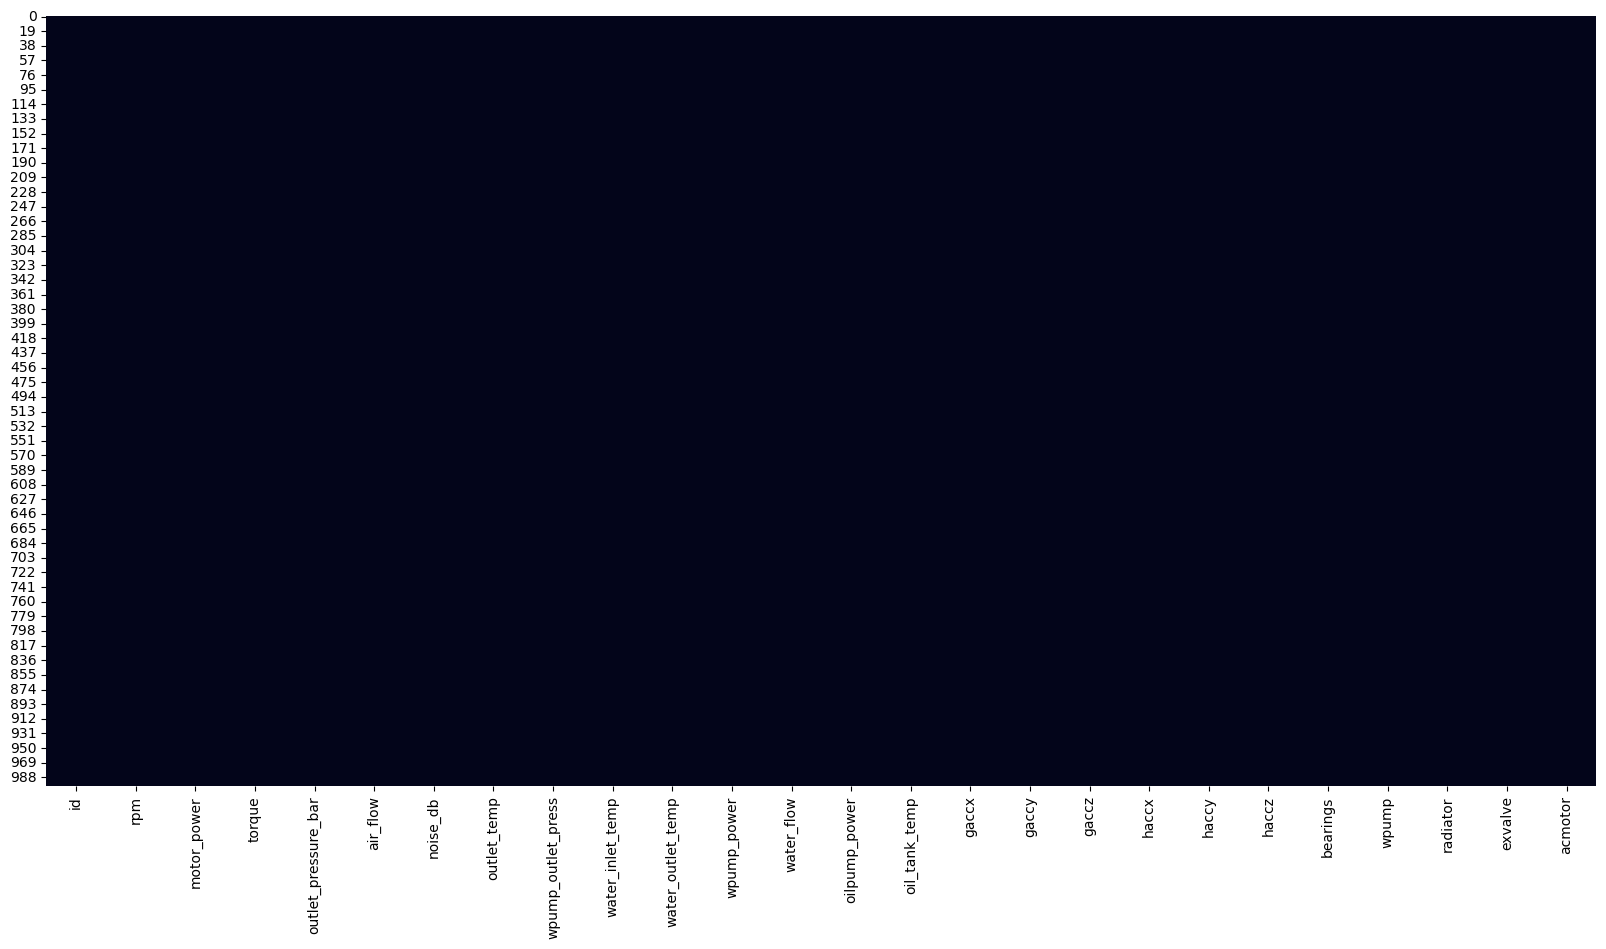

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.isna(), cbar=False)

In [8]:
(df1.isna().sum()/df1.shape[0]).sort_values()

id                     0.0
radiator               0.0
wpump                  0.0
bearings               0.0
haccz                  0.0
haccy                  0.0
haccx                  0.0
gaccz                  0.0
gaccy                  0.0
gaccx                  0.0
oil_tank_temp          0.0
oilpump_power          0.0
water_flow             0.0
wpump_power            0.0
water_outlet_temp      0.0
water_inlet_temp       0.0
wpump_outlet_press     0.0
outlet_temp            0.0
noise_db               0.0
air_flow               0.0
outlet_pressure_bar    0.0
torque                 0.0
motor_power            0.0
rpm                    0.0
exvalve                0.0
acmotor                0.0
dtype: float64

In [9]:
# Créer une fonction pour attribuer un diagnostic clair à chaque ligne
def assign_diagnostic(row):
    if row['bearings'] == 'Noisy' or row['wpump'] == 'Noisy' or row['radiator'] == 'Dirty' or row['exvalve'] == 'Dirty':
        return 'Défaillant'
    else:
        return 'Sans problème'

# Appliquer la fonction à chaque ligne
df1['diagnostic'] = df1.apply(assign_diagnostic, axis=1)

# Afficher un aperçu du résultat
df1[['rpm', 'diagnostic']].head()


rpm     diagnostic
0  499  Sans problème
1  513  Sans problème
2  495  Sans problème
3  480  Sans problème
4  498  Sans problème

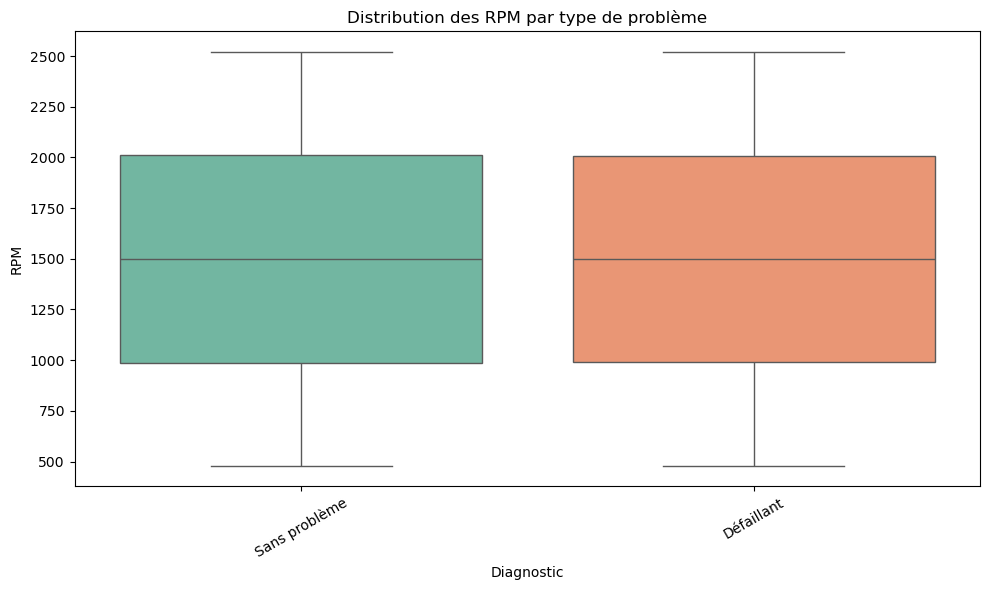

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='diagnostic', y='rpm', palette='Set2', hue='diagnostic')
plt.xticks(rotation=30)
plt.title("Distribution des RPM par type de problème")
plt.xlabel("Diagnostic")
plt.ylabel("RPM")
plt.tight_layout()
plt.show()

### Analyse de fond

#### Examen des colonnes target

In [11]:
df1['acmotor'].value_counts(normalize=True)

acmotor
Stable    1.0
Name: proportion, dtype: float64

In [12]:
df1['bearings'].value_counts(normalize=True)

bearings
Ok       0.8
Noisy    0.2
Name: proportion, dtype: float64

In [13]:
df1['wpump'].value_counts(normalize=True)

wpump
Ok       0.8
Noisy    0.2
Name: proportion, dtype: float64

In [14]:
df1['radiator'].value_counts(normalize=True)

radiator
Clean    0.8
Dirty    0.2
Name: proportion, dtype: float64

In [15]:
df1['exvalve'].value_counts(normalize=True)

exvalve
Clean    0.8
Dirty    0.2
Name: proportion, dtype: float64

In [16]:
df1 = df1.drop(['acmotor', 'id'], axis=1)

In [17]:
df1.head()

rpm  motor_power     torque  outlet_pressure_bar    air_flow   noise_db  \
0  499  1405.842858  27.511708                1.000  308.289879  40.840517   
1  513  1457.370092  31.030115                1.081  307.833736  40.484226   
2  495  1582.249959  33.484653                1.369  307.377593  40.918572   
3  480  1712.466820  36.394475                1.691  306.975248  40.450953   
4  498  1766.035170  38.249154                1.731  306.832132  41.233739   

   outlet_temp  wpump_outlet_press  water_inlet_temp  water_outlet_temp  ...  \
0    78.554715            2.960632         43.166392          47.259238  ...   
1    76.902822            2.536711         47.342143          55.025653  ...   
2    77.547021            2.112789         49.306593          50.505622  ...   
3    80.059949            2.087534         46.886933          58.706376  ...   
4    79.130424            2.338877         50.498100          54.046362  ...   

      gaccy     gaccz     haccx     haccy     haccz  bearings  wpump  \
0  0.383773  2.649801  1.213344  1.409218  2.962484        Ok     Ok   
1  0.450954  2.669423  1.210674  1.379050  2.938135        Ok     Ok   
2  0.443924  2.772009  1.210612  1.373490  2.991878        Ok     Ok   
3  0.370457  2.876056  1.213223  1.443234  3.096158        Ok     Ok   
4  0.383868  2.849451  1.209216  1.405190  3.059417        Ok     Ok   

   radiator  exvalve     diagnostic  
0     Clean    Clean  Sans problème  
1     Clean    Clean  Sans problème  
2     Clean    Clean  Sans problème  
3     Clean    Clean  Sans problème  
4     Clean    Clean  Sans problème  

[5 rows x 25 columns]

#### Variable quantitative

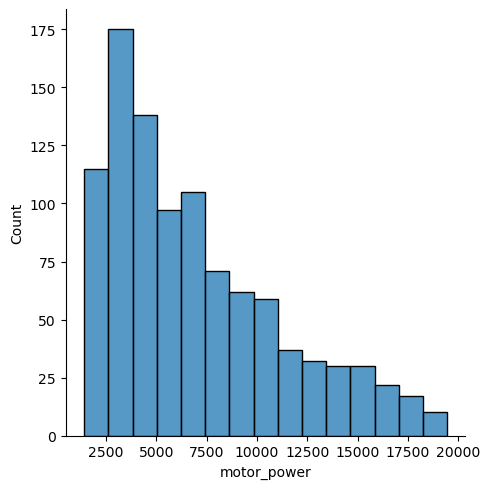

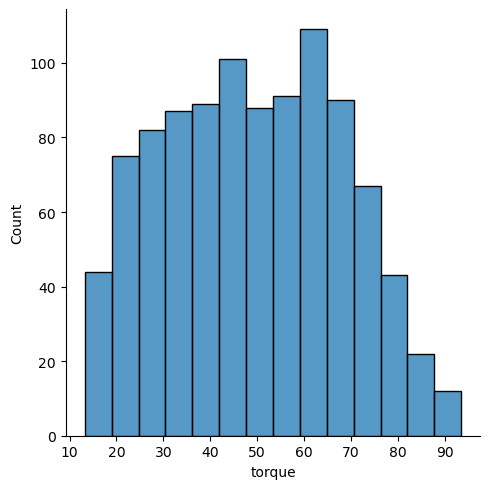

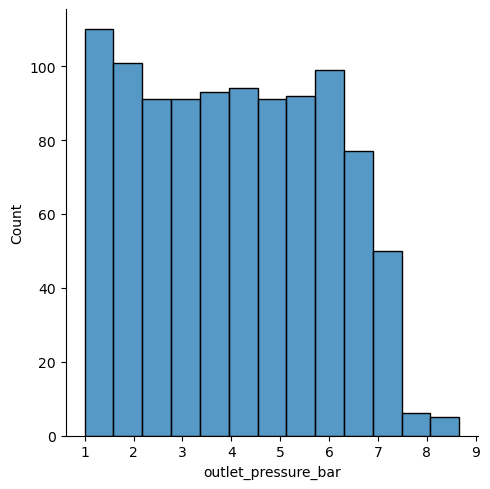

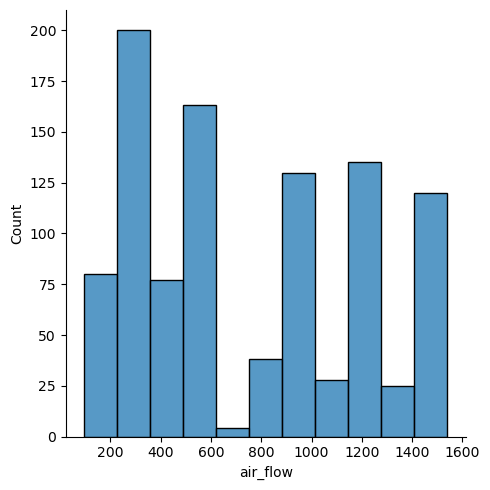

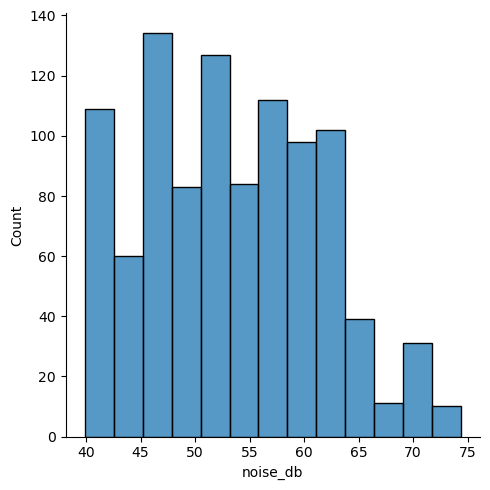

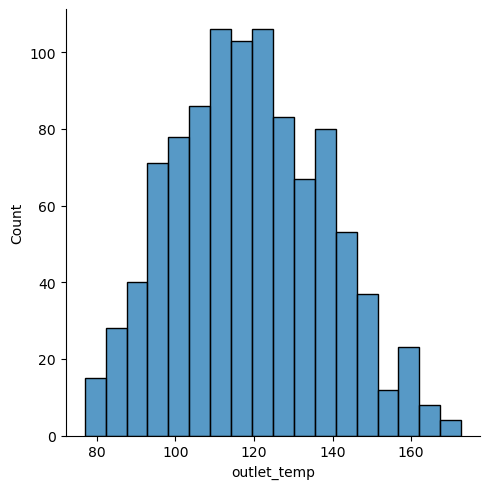

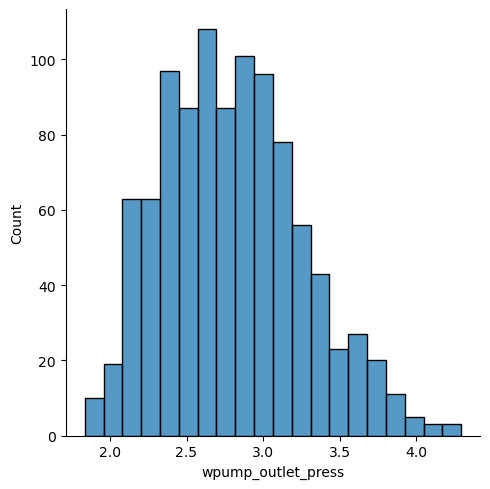

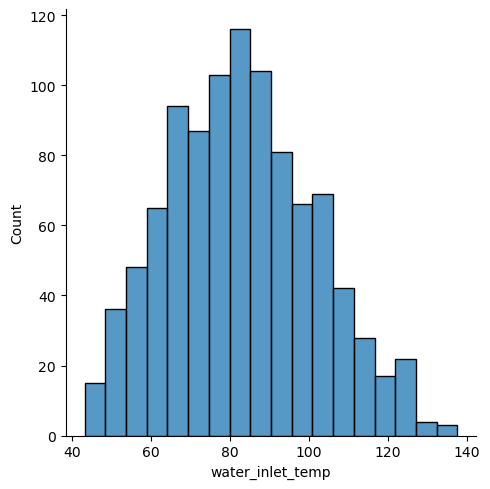

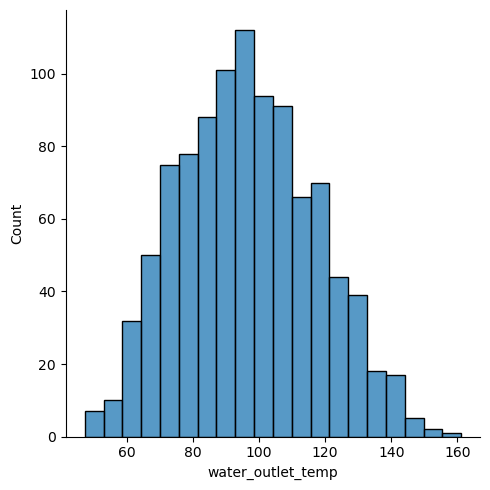

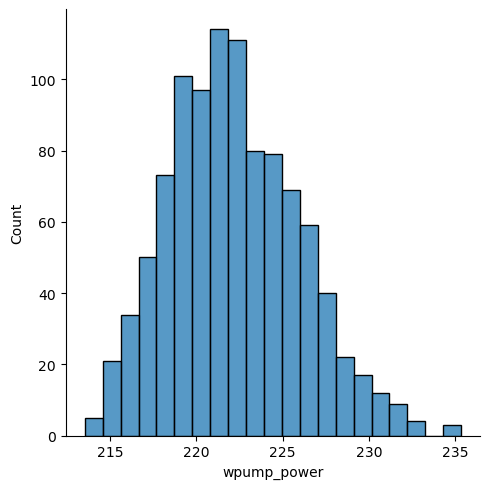

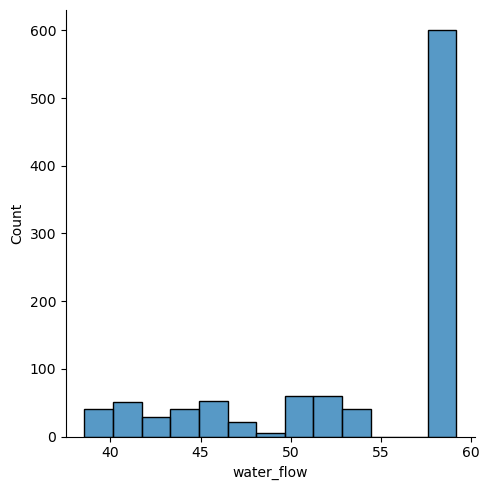

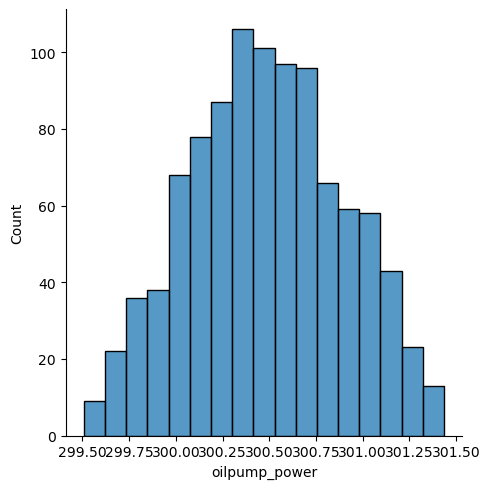

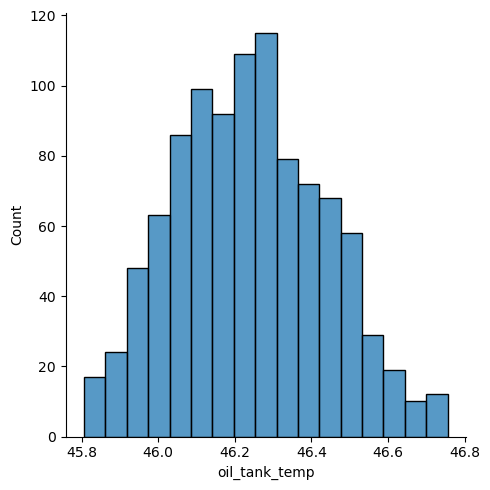

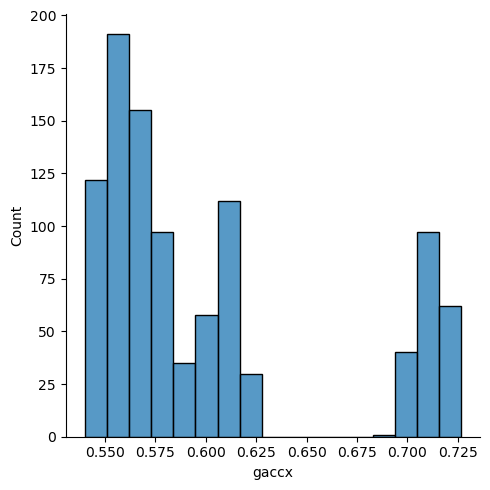

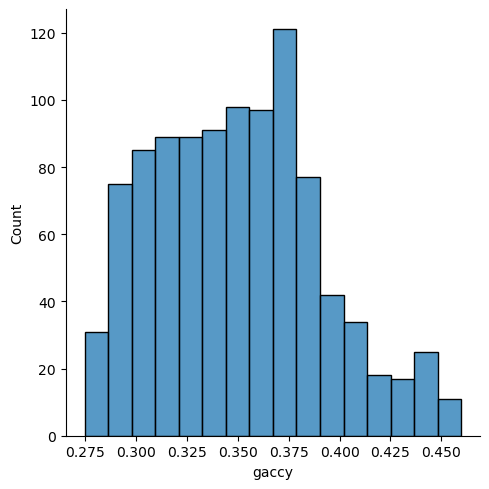

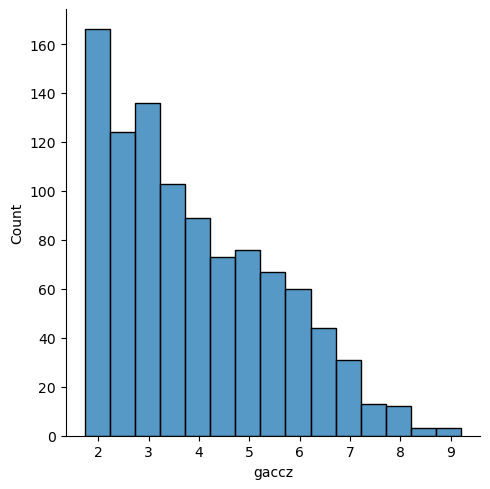

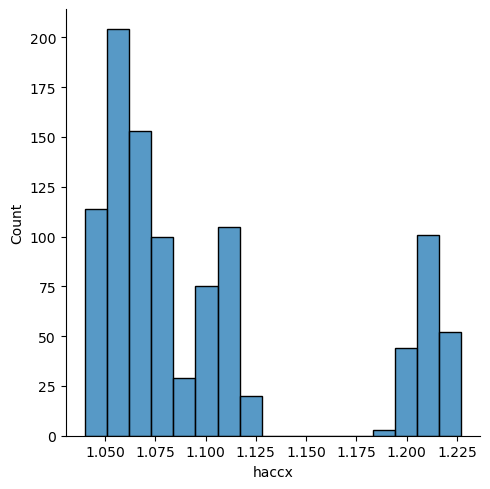

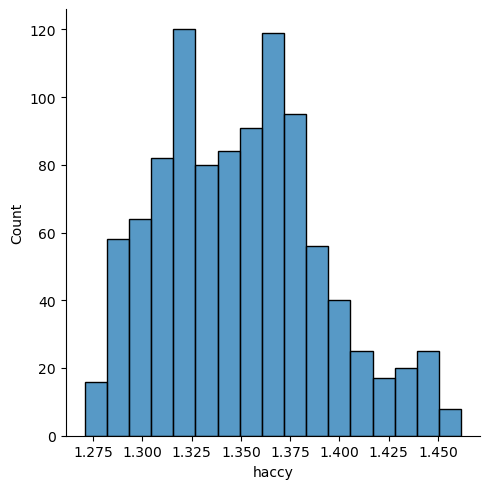

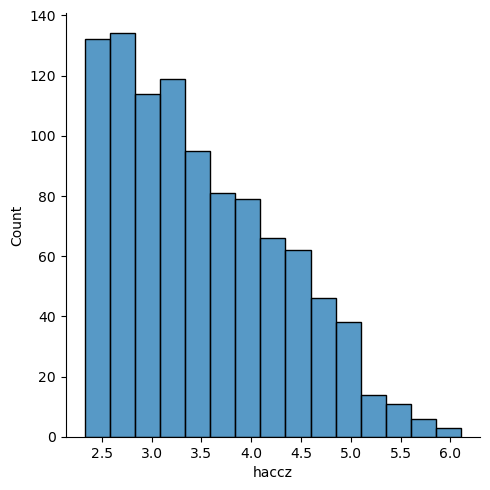

In [18]:
for col in df1.select_dtypes('float'):
    sns.displot(df1[col])

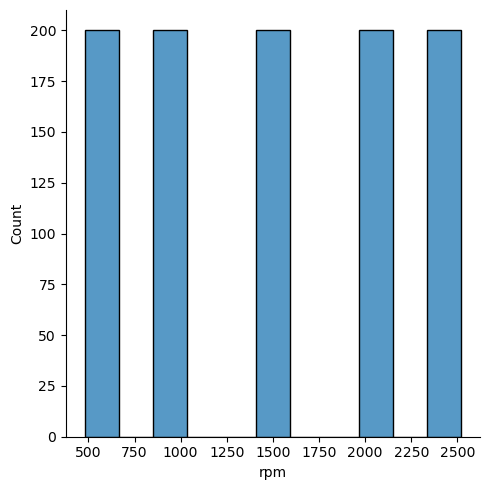

In [19]:
sns.displot(df1['rpm'])

#### Variables qualitatives

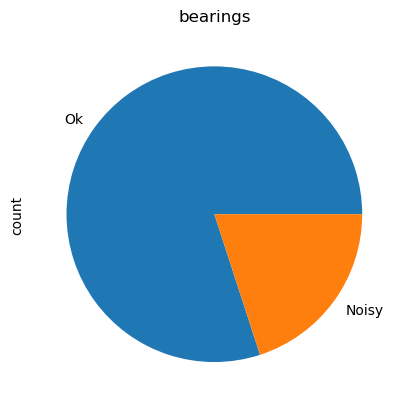

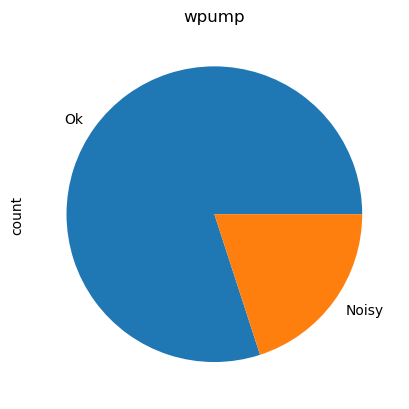

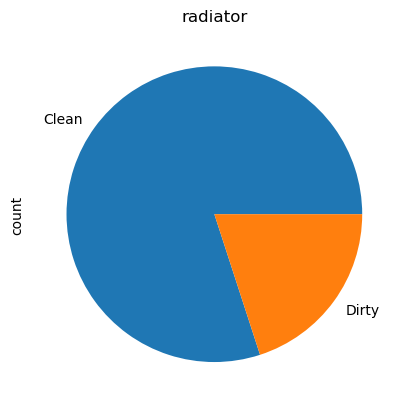

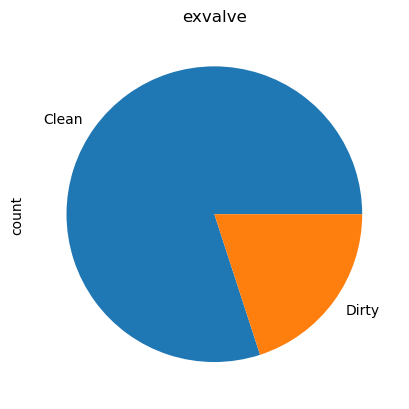

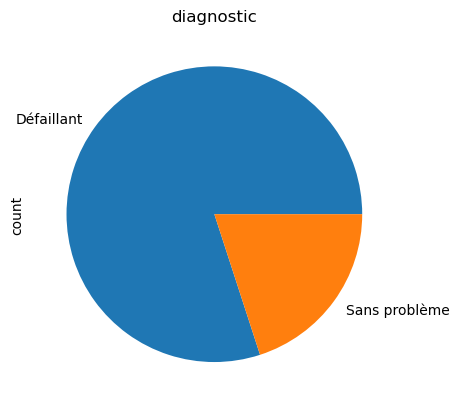

In [20]:
for col in df1.select_dtypes('object'):
    plt.figure()
    df1[col].value_counts().plot.pie()
    plt.title(col)

#### Relation Target/Values

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Appliquer KMeans pour regrouper en 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df1['Machine_Model'] = kmeans.fit_predict(df1[['rpm']])

# Identifier les colonnes numériques à normaliser
num_cols = ['rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow', 'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
            'water_outlet_temp', 'wpump_power','water_flow', 'oilpump_power', 'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx',
           'haccy', 'haccz']  # Adapter selon ton dataset

df1[num_cols] = df1[num_cols].astype(float)

# Standardisation par modèle de machine
scaler = MinMaxScaler()

for model in df1['Machine_Model'].unique():  
    mask = df1['Machine_Model'] == model  # Filtrer les lignes correspondant à ce modèle
    df1.loc[mask, num_cols] = scaler.fit_transform(df1.loc[mask, num_cols])  # Appliquer le MinMaxScaler

C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\QuentinGENSE\anaconda3\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\QuentinGENSE\anaconda3\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\QuentinGENSE\anaconda3\Lib\subprocess.py", line 1540, in _execute_child
    hp, ht,

In [22]:
clean_radiator = df1[df1['radiator'] == 'Clean']
dirty_radiator = df1[df1['radiator'] == 'Dirty']

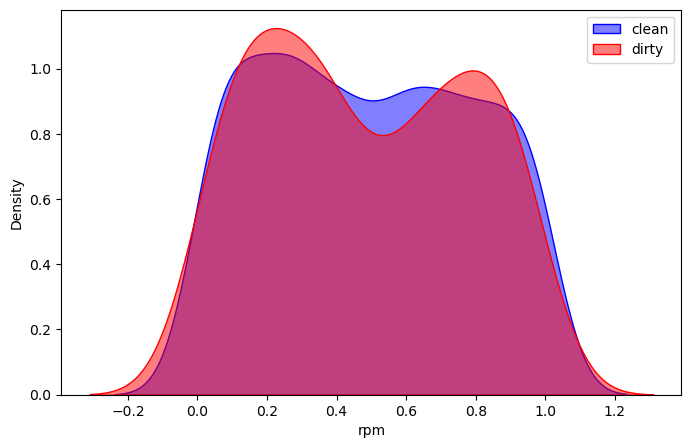

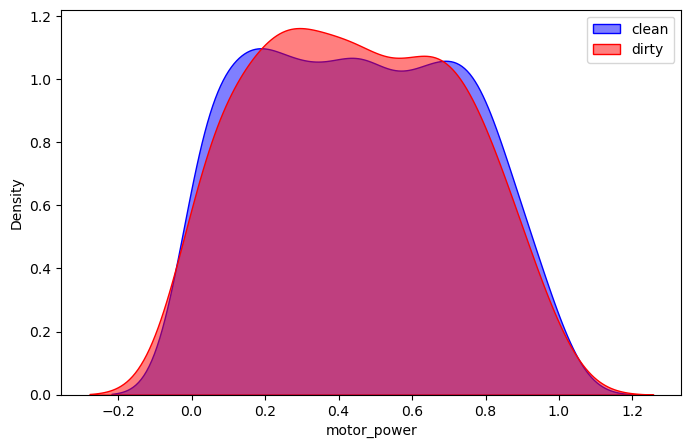

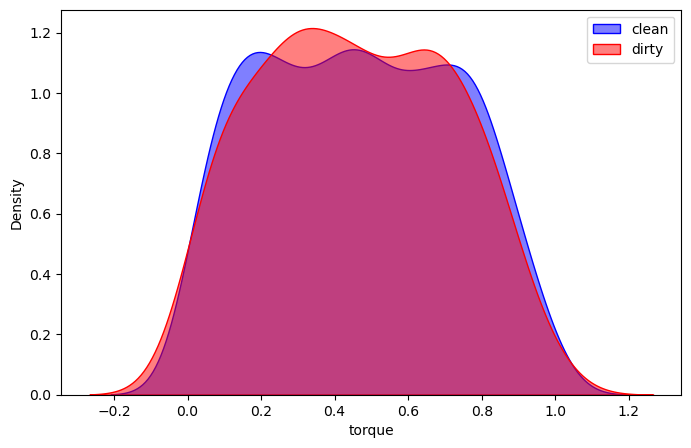

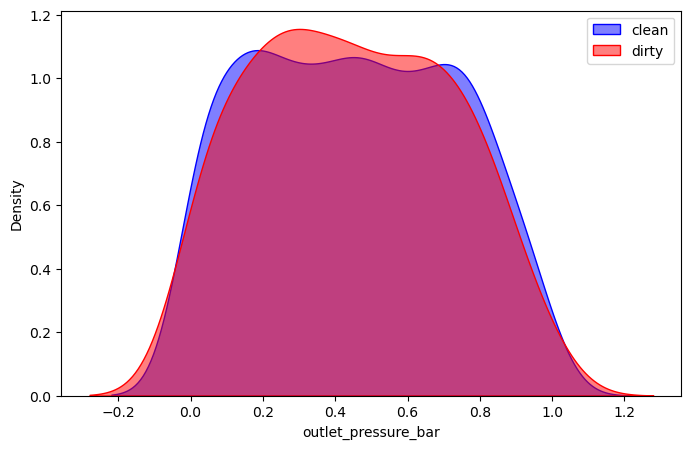

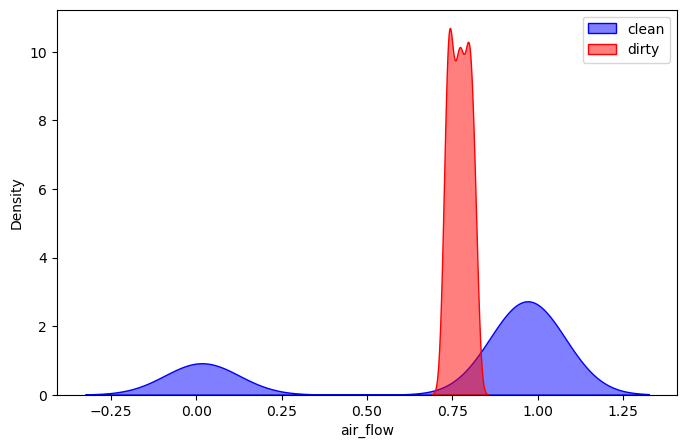

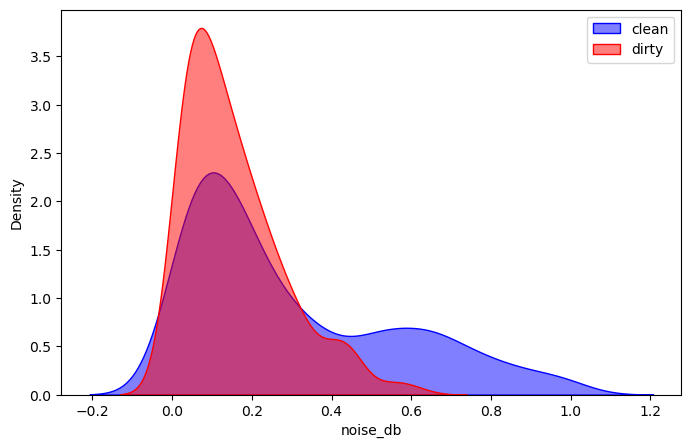

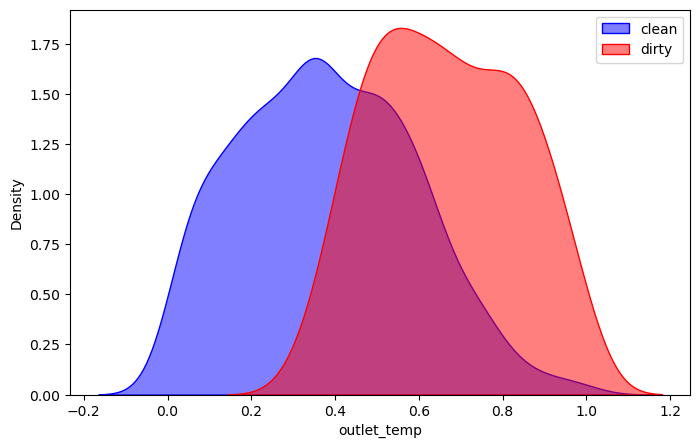

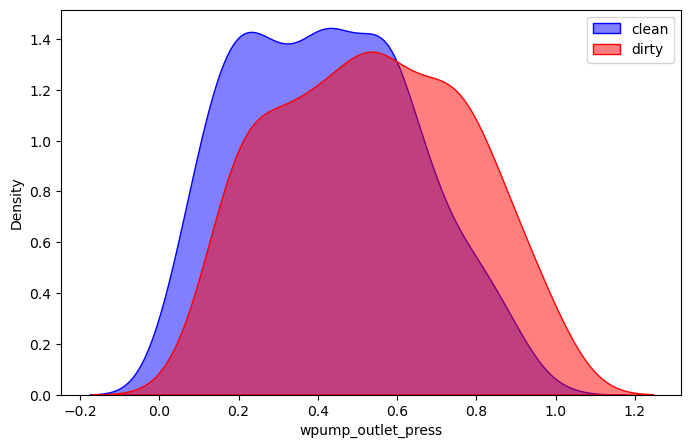

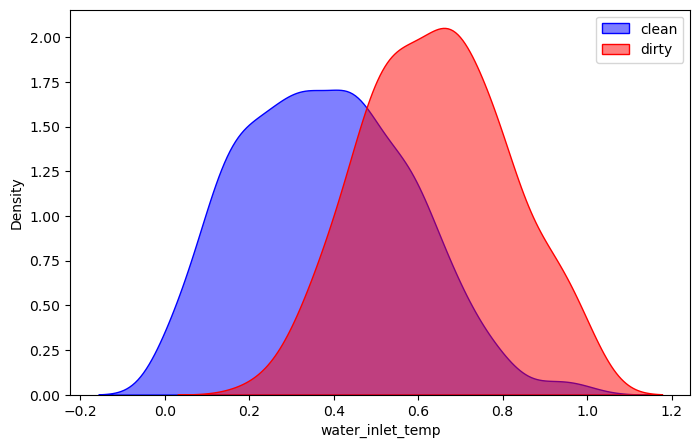

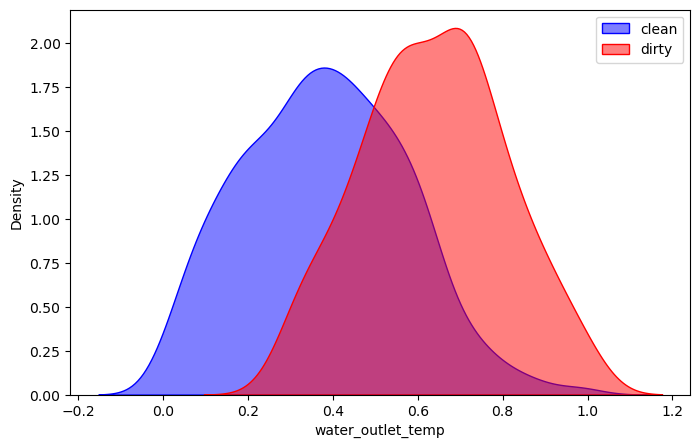

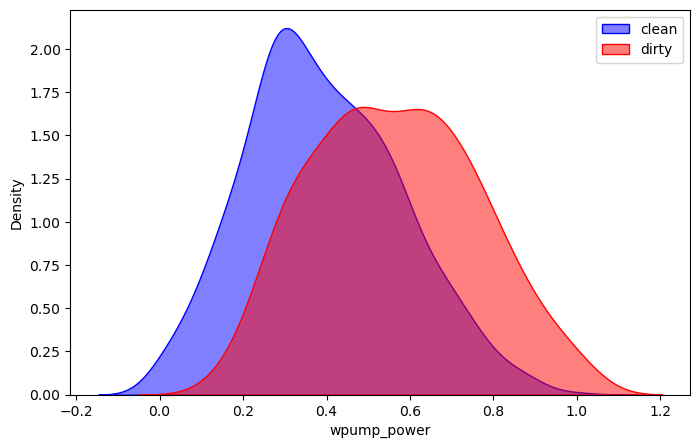

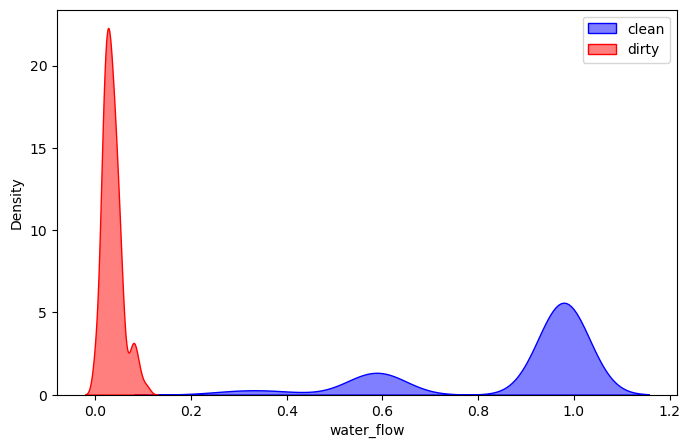

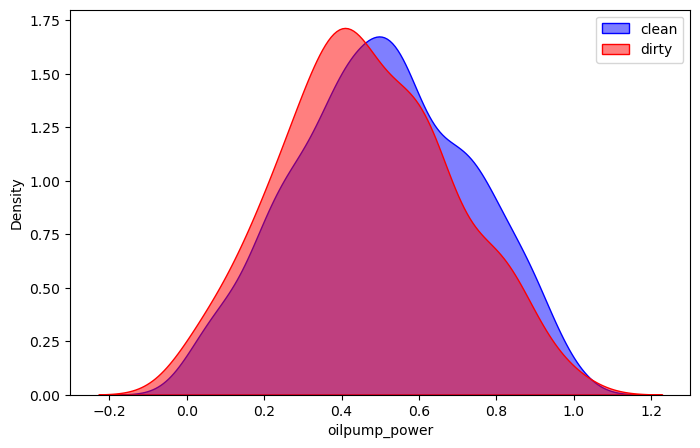

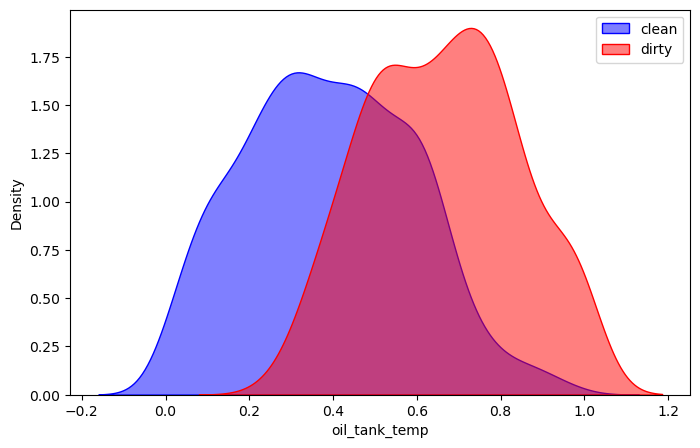

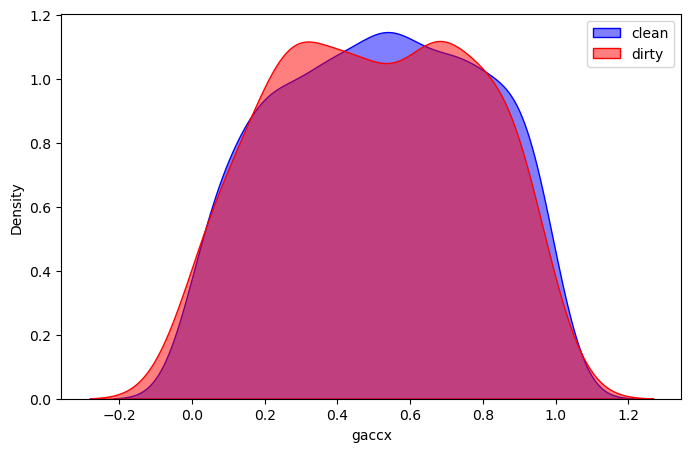

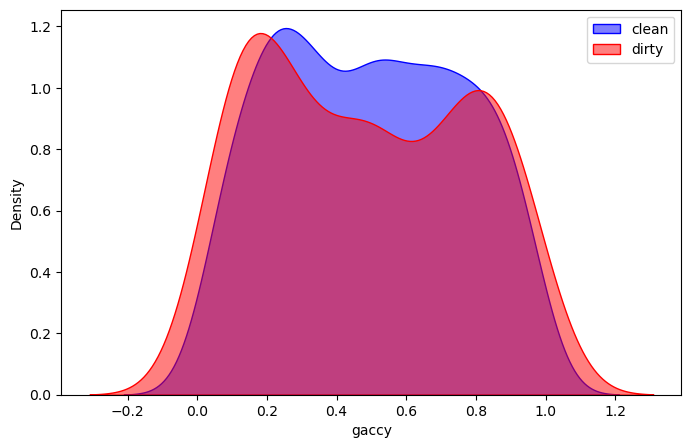

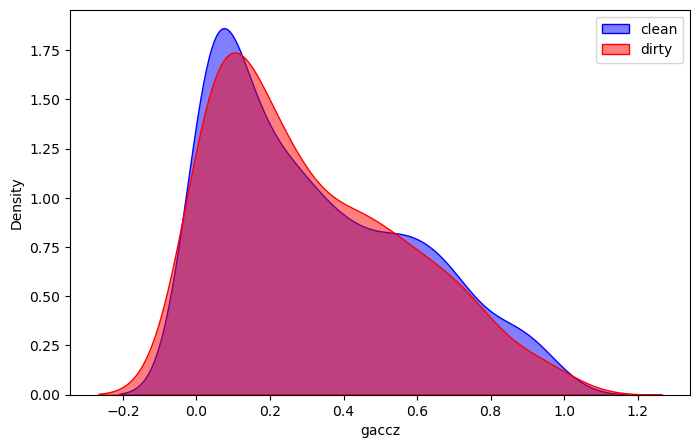

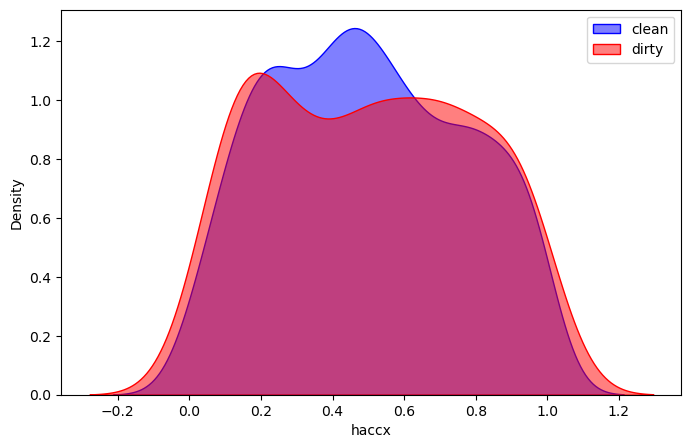

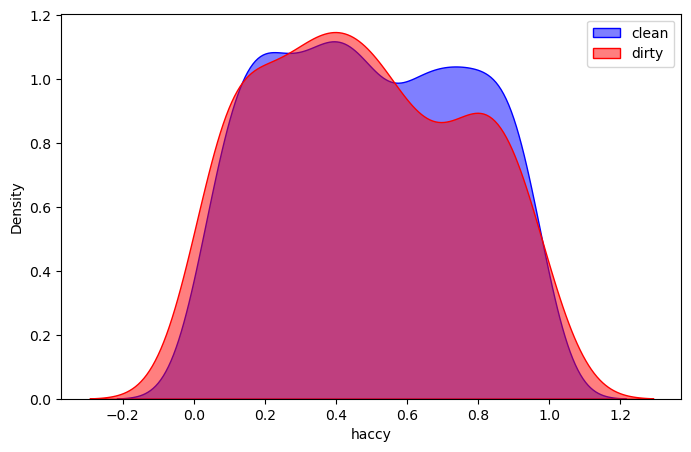

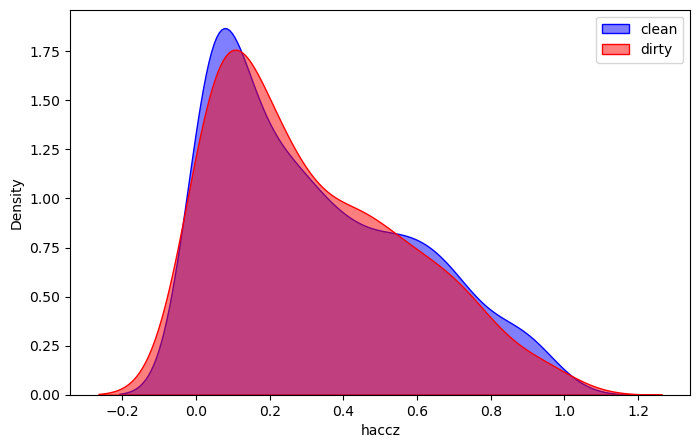

In [23]:
for col in df1.select_dtypes(include=['float']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(clean_radiator[col], label='clean', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(dirty_radiator[col], label='dirty', fill=True, alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [24]:
clean_exvalve = df1[df1['exvalve'] == 'Clean']
dirty_exvalve = df1[df1['exvalve'] == 'Dirty']

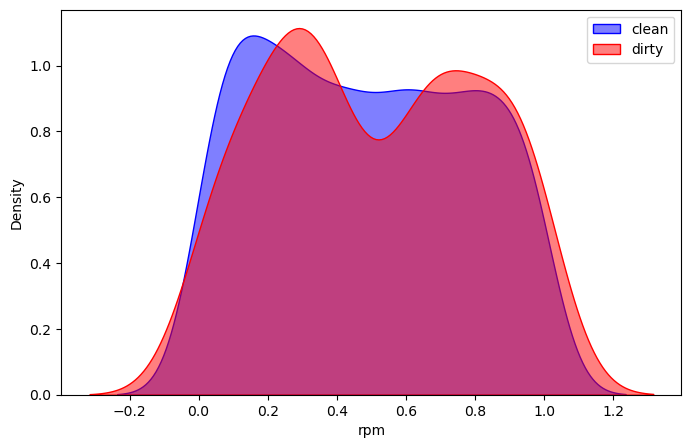

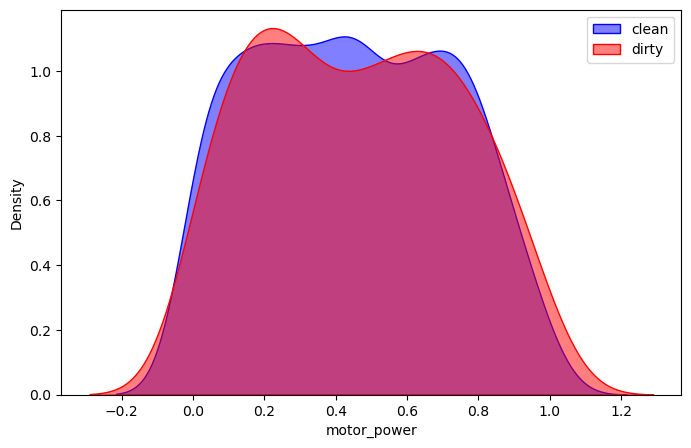

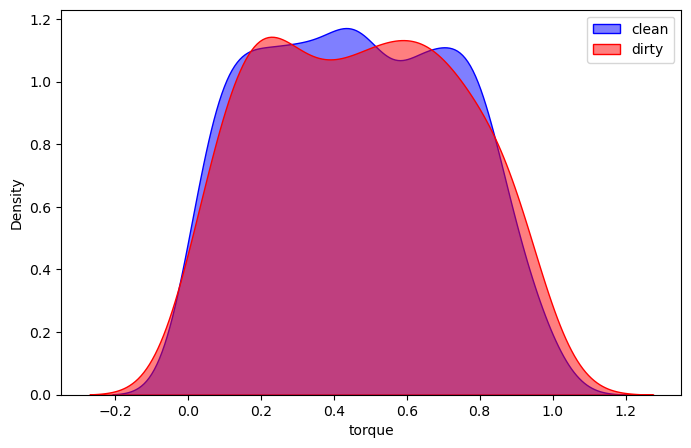

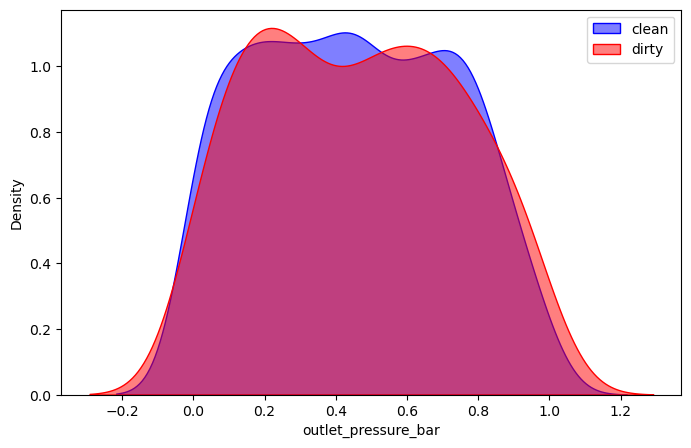

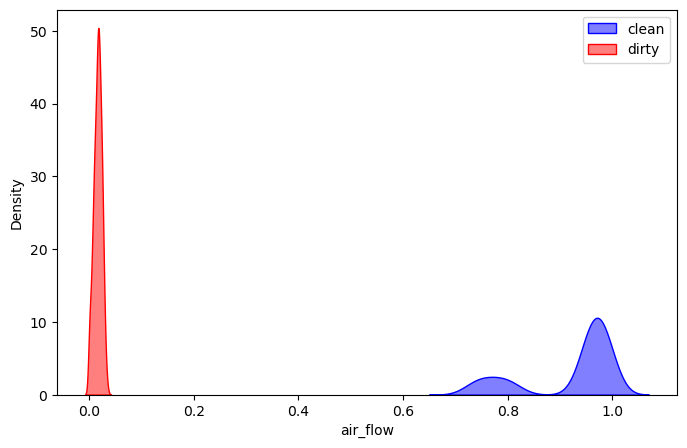

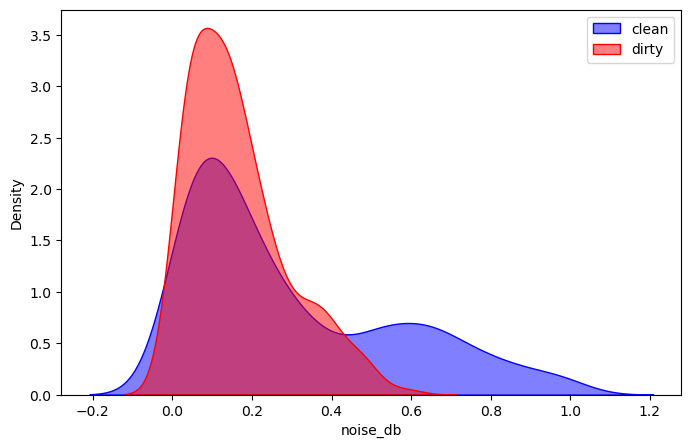

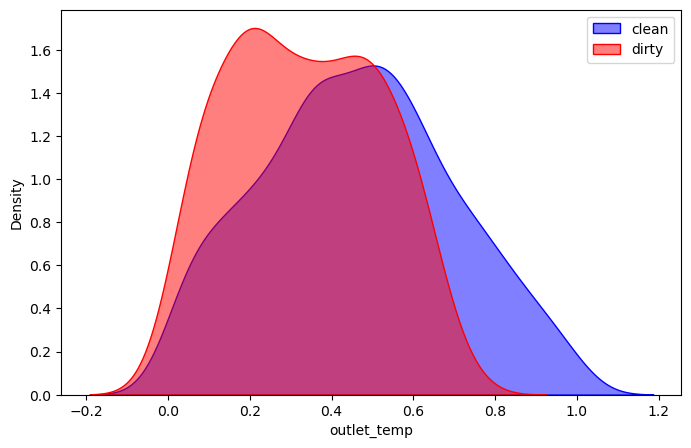

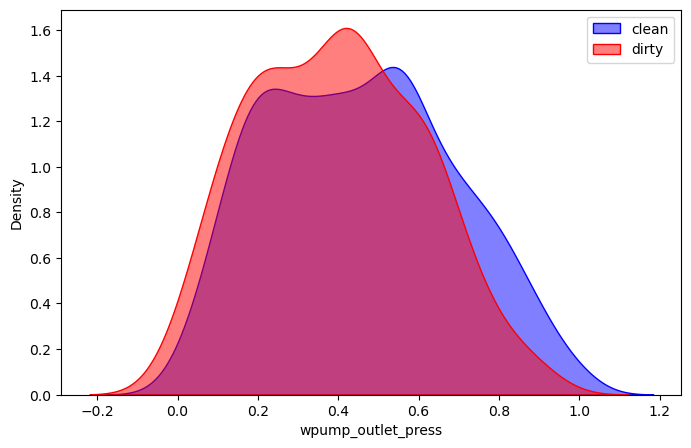

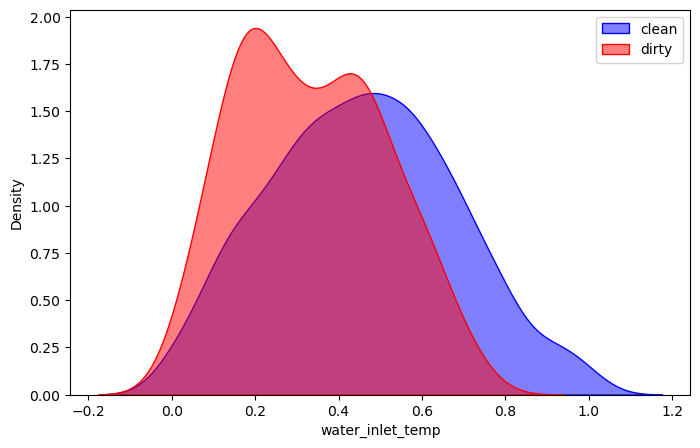

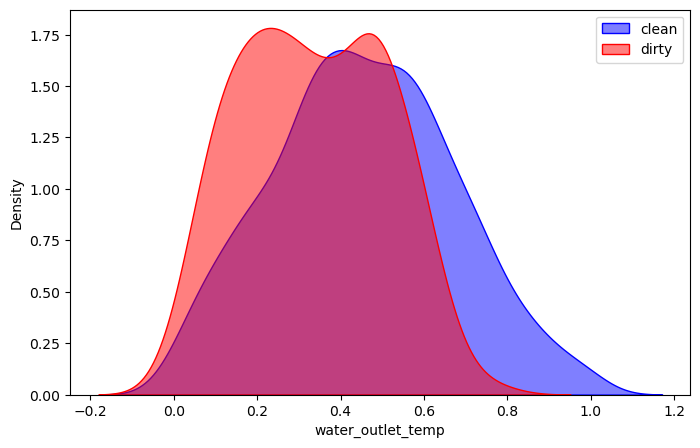

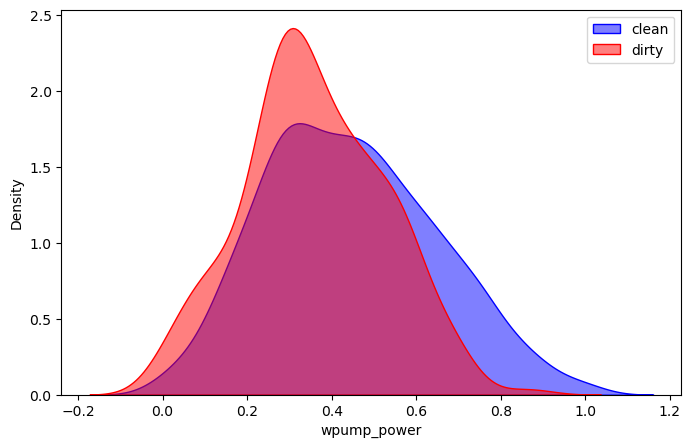

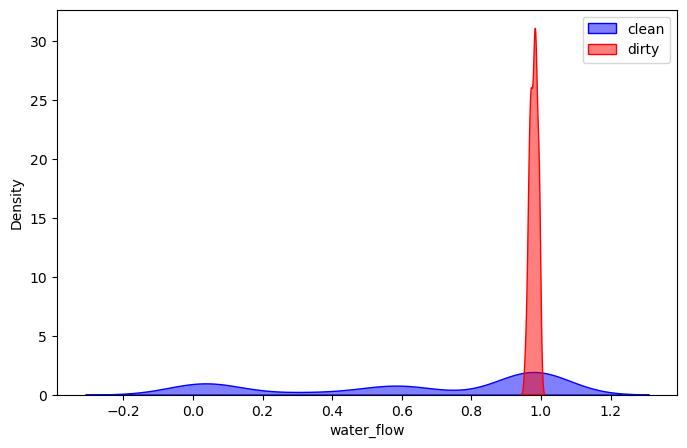

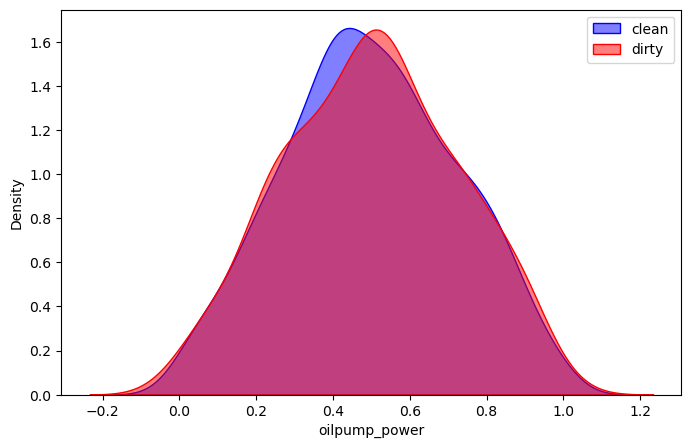

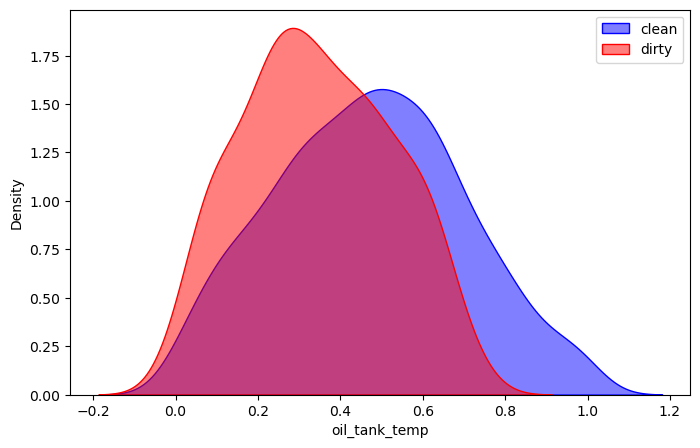

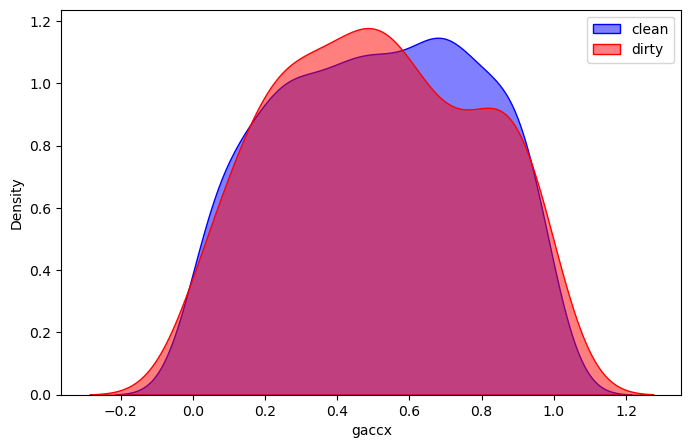

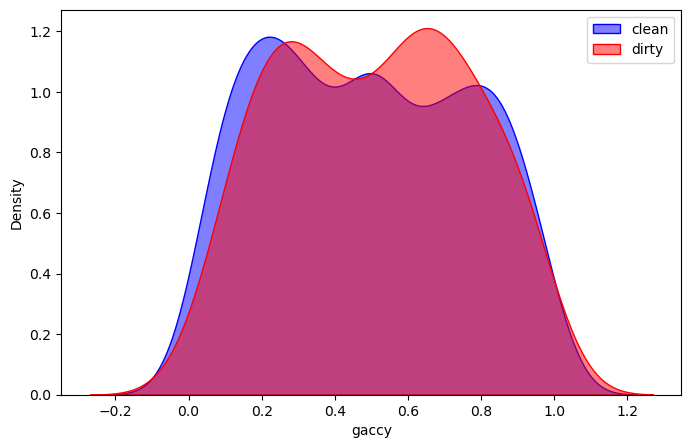

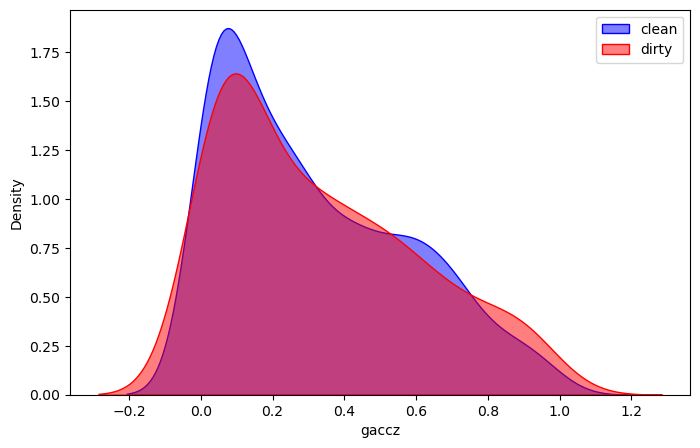

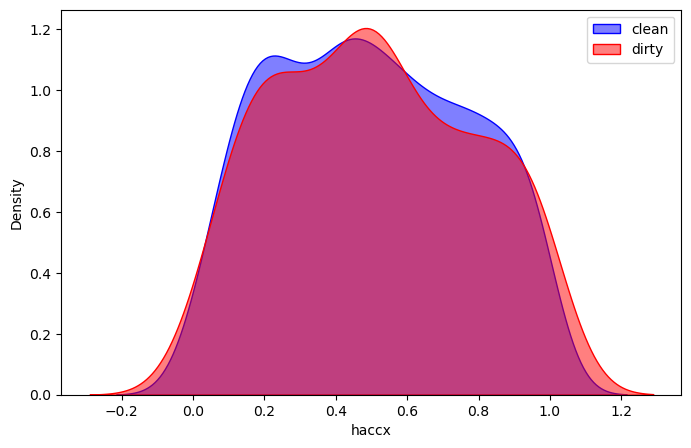

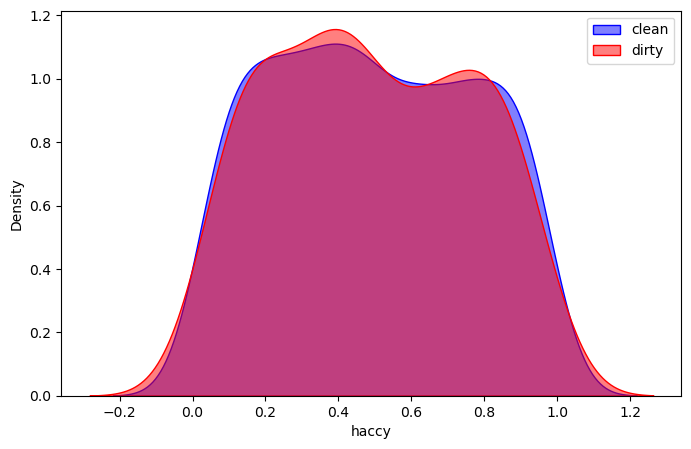

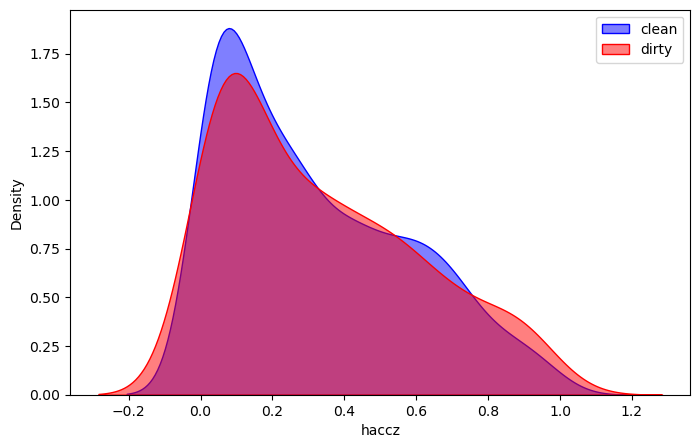

In [25]:
for col in df1.select_dtypes(include=['float']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(clean_exvalve[col], label='clean', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(dirty_exvalve[col], label='dirty', fill=True, alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [26]:
ok_wpump = df1[df1['wpump'] == 'Ok']
noisy_wpump = df1[df1['wpump'] == 'Noisy']

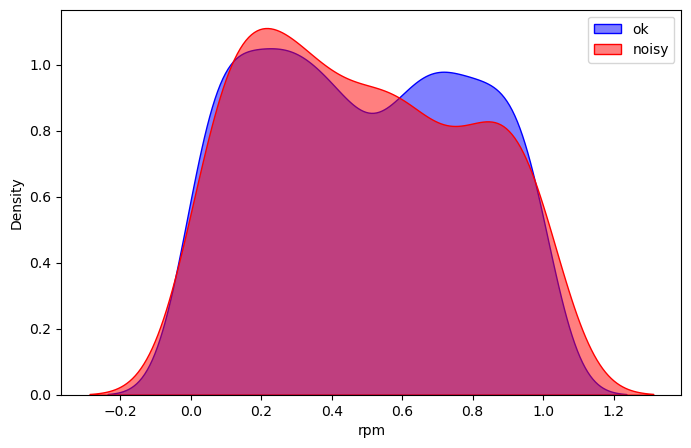

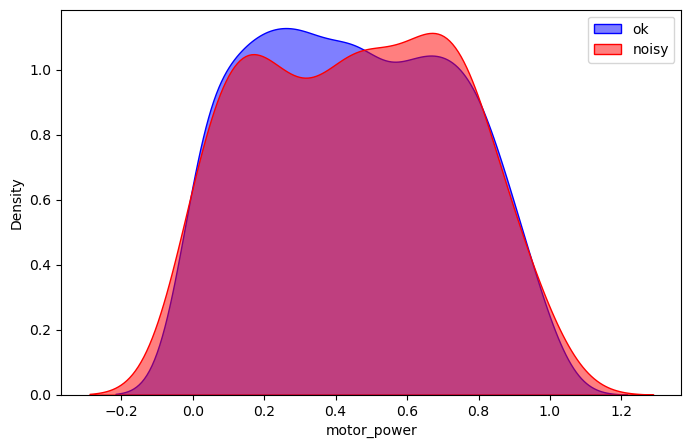

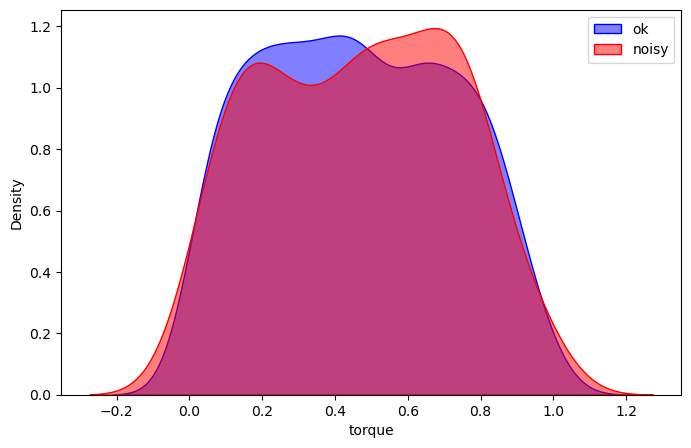

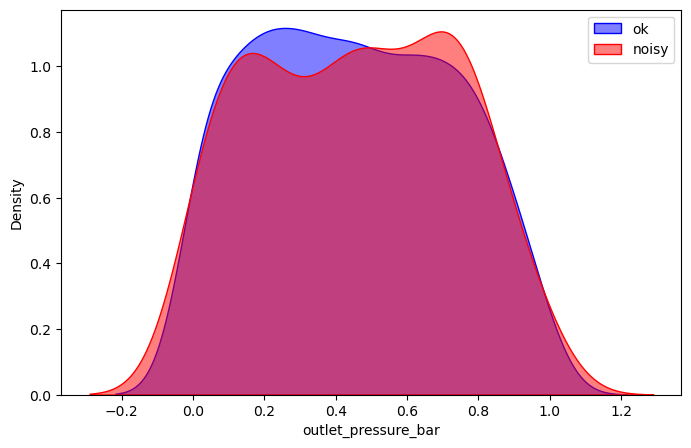

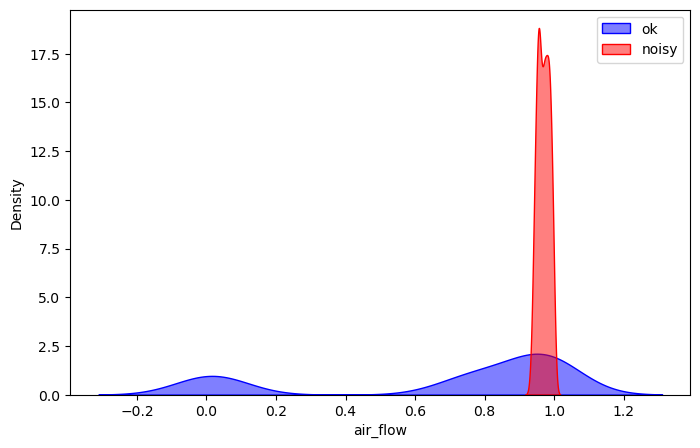

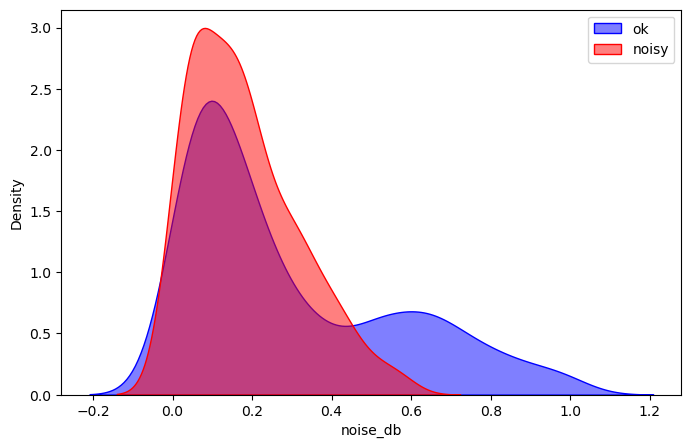

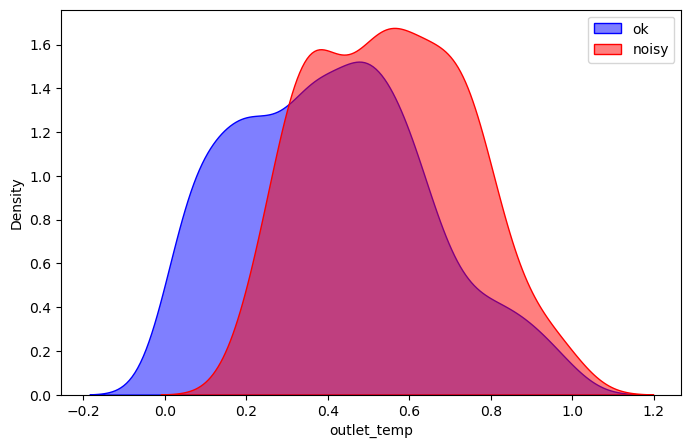

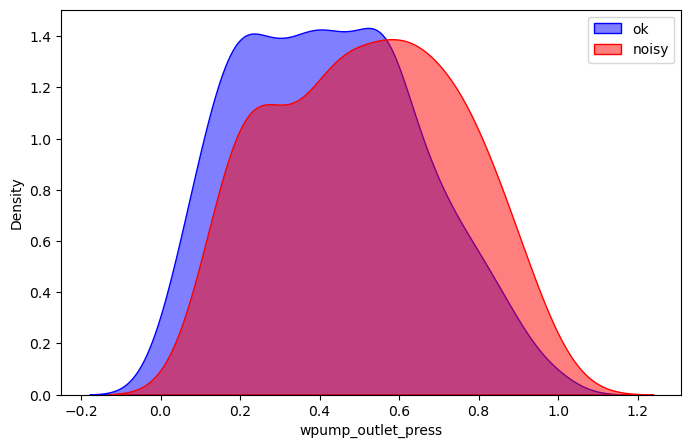

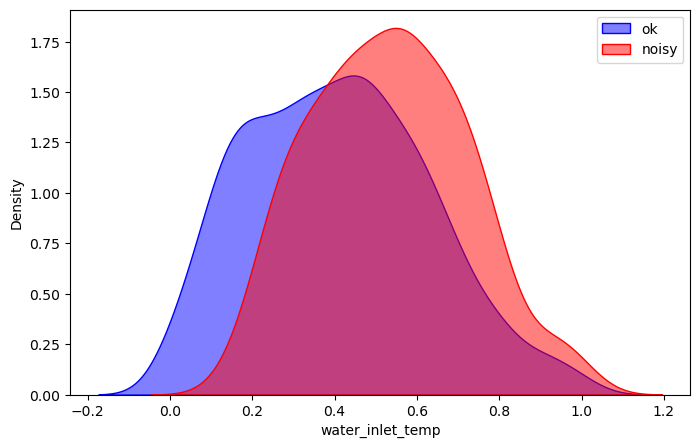

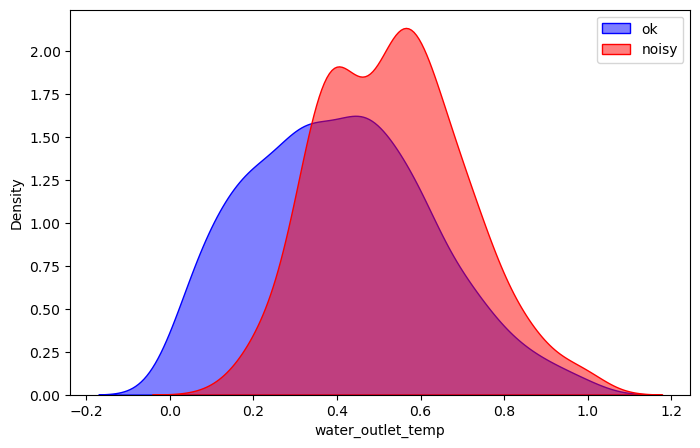

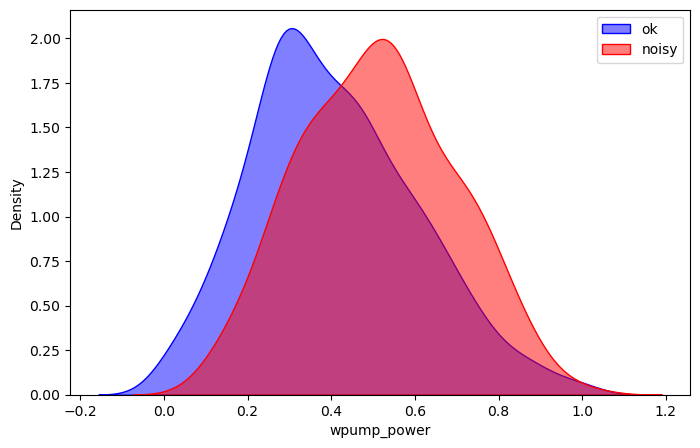

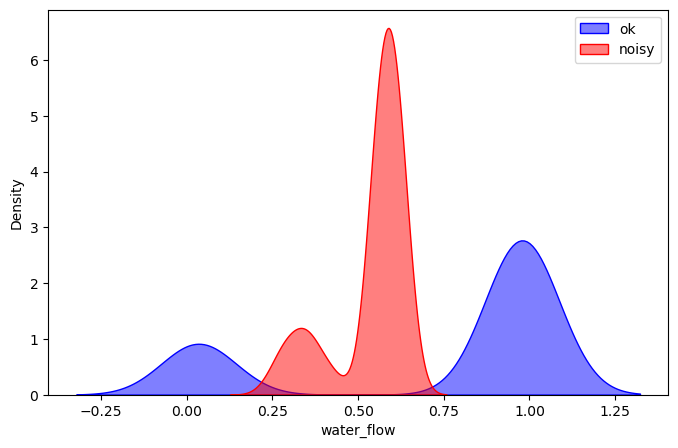

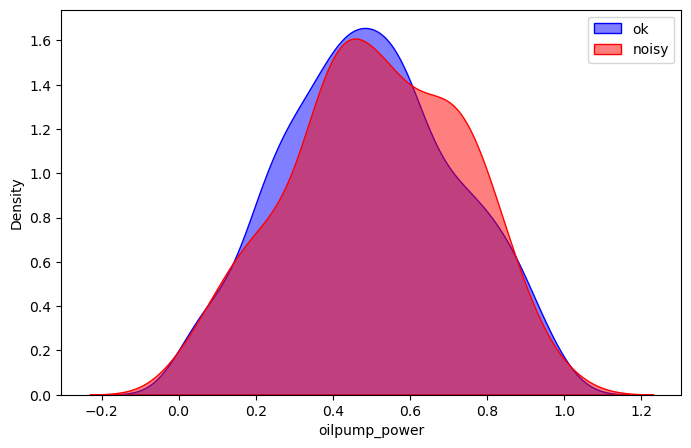

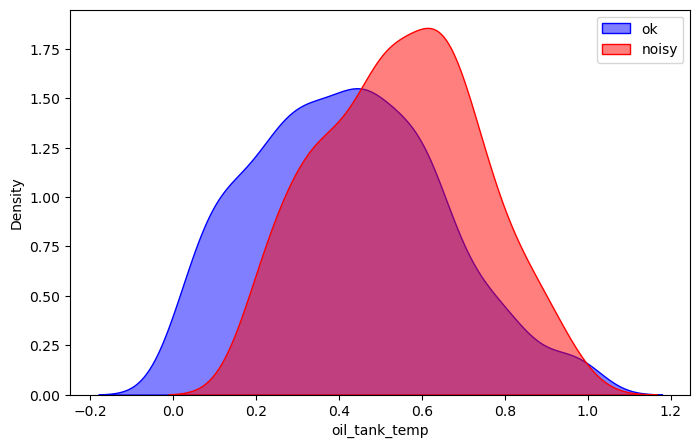

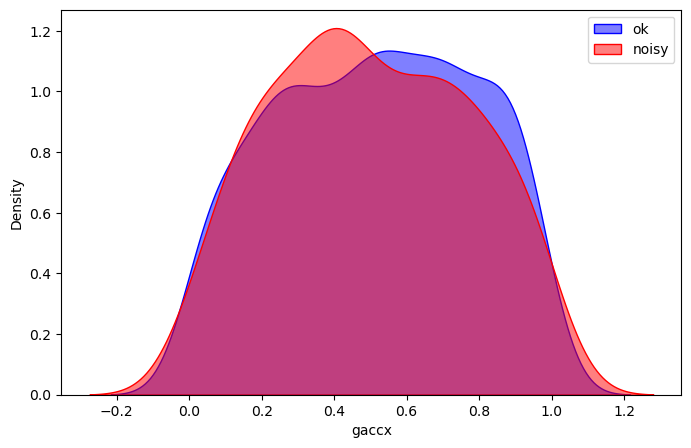

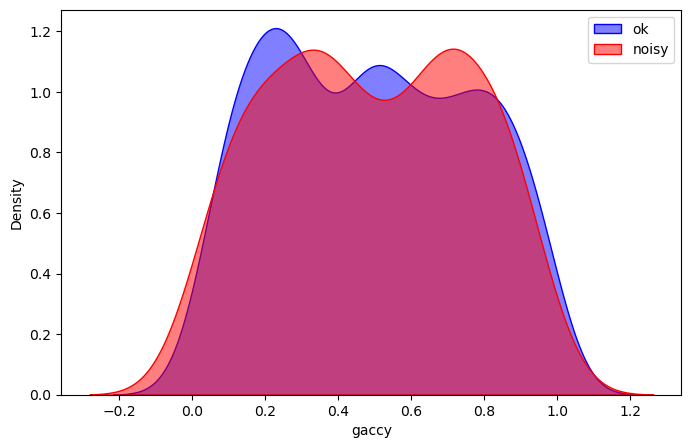

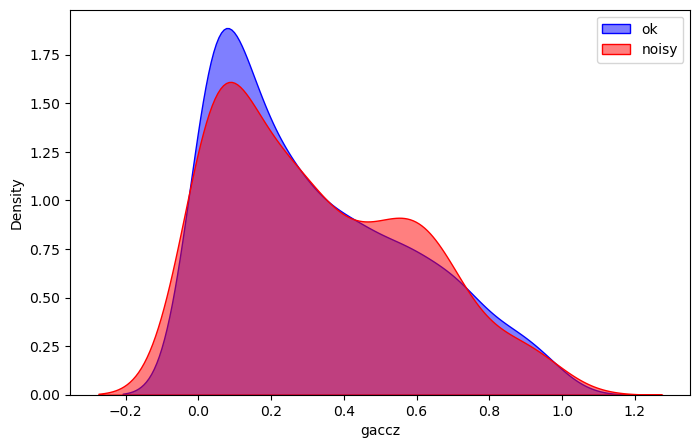

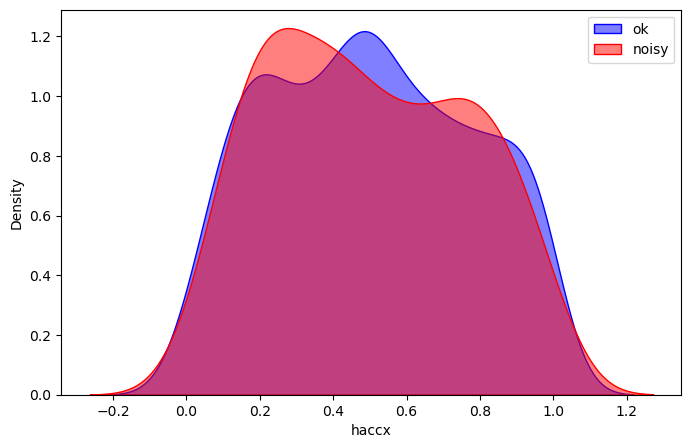

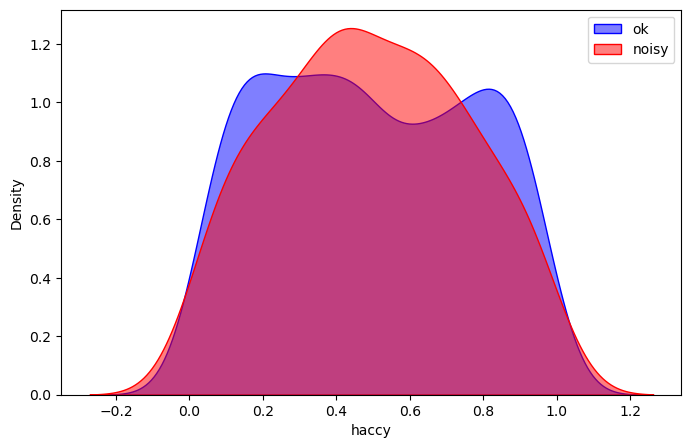

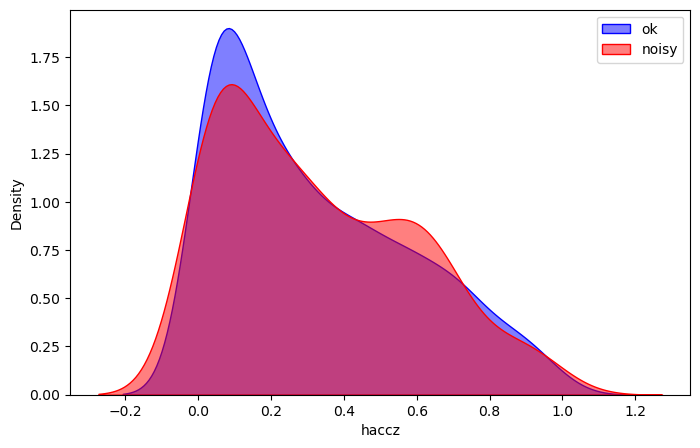

In [27]:
for col in df1.select_dtypes(include=['float']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(ok_wpump[col], label='ok', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(noisy_wpump[col], label='noisy', fill=True, alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [28]:
ok_bearings = df1[df1['bearings'] == 'Ok']
noisy_bearings = df1[df1['bearings'] == 'Noisy']

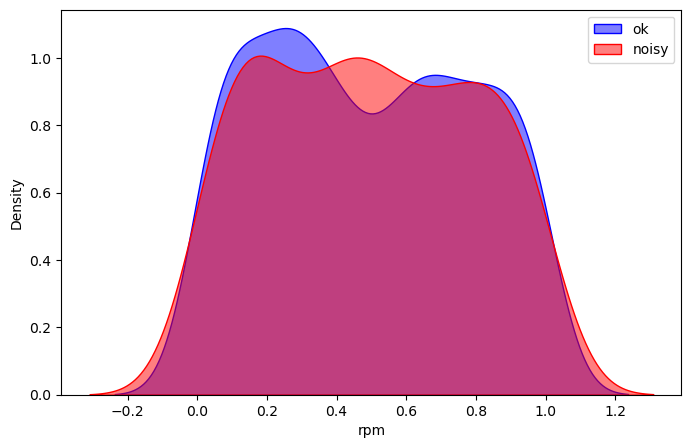

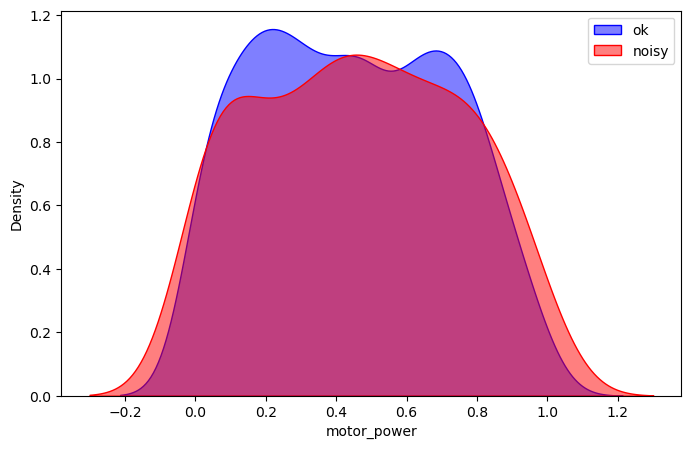

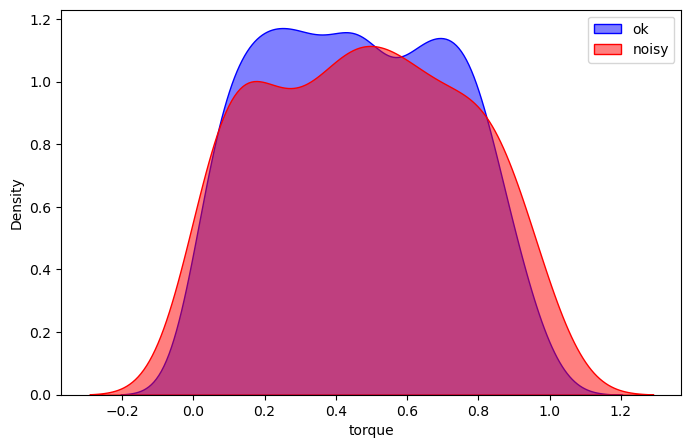

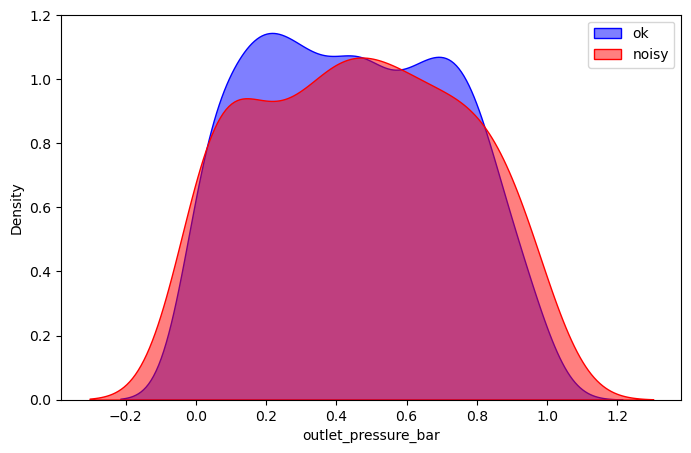

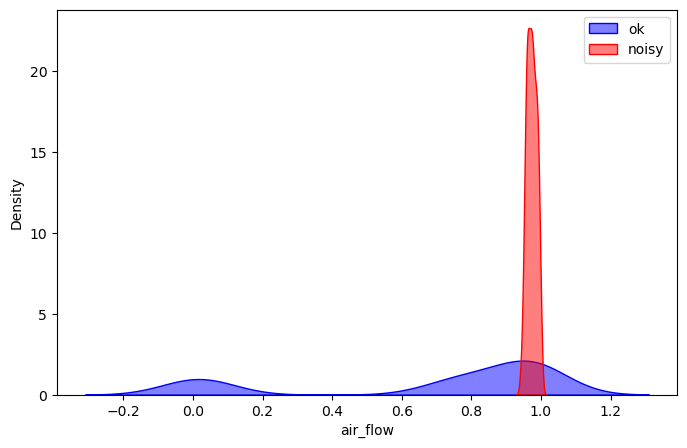

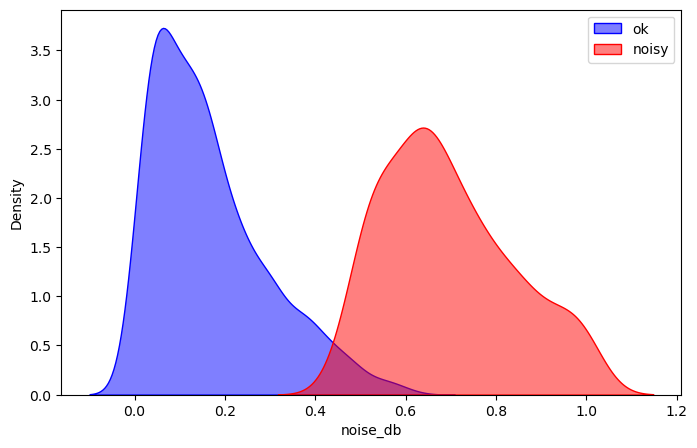

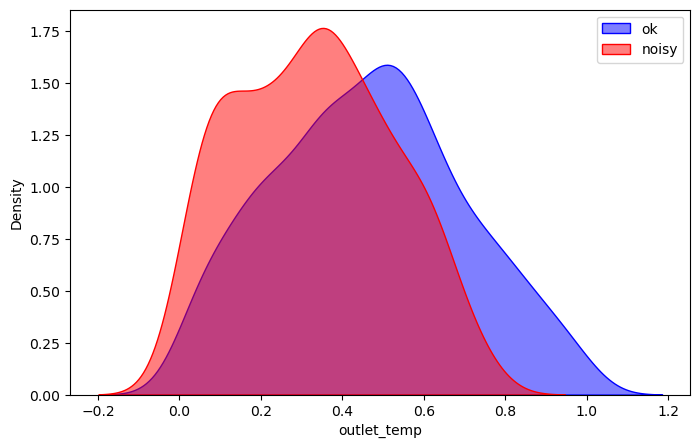

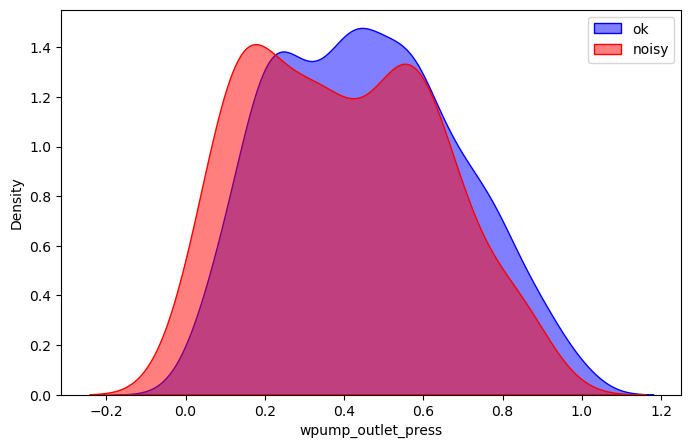

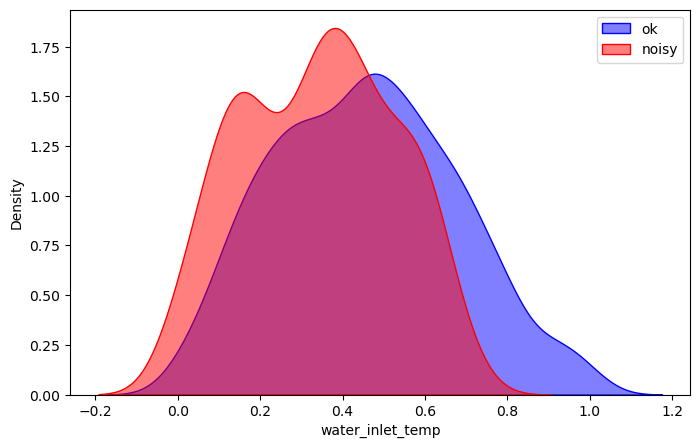

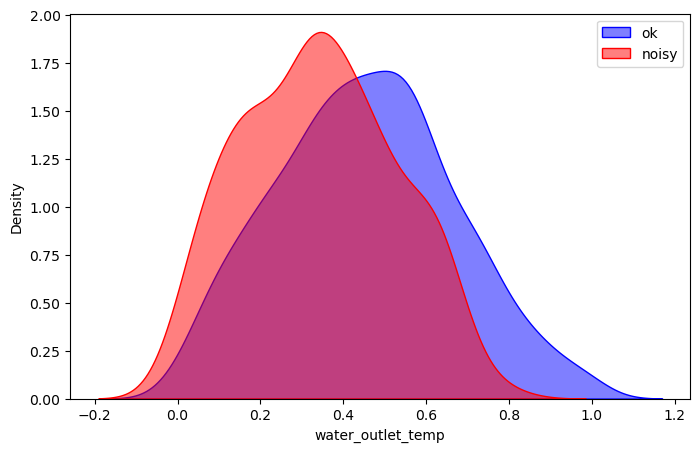

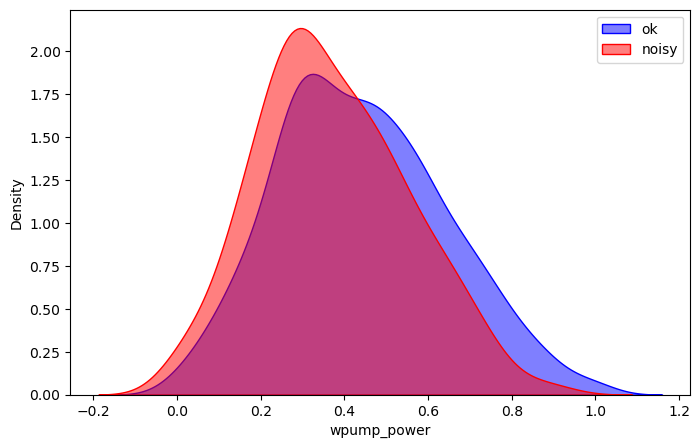

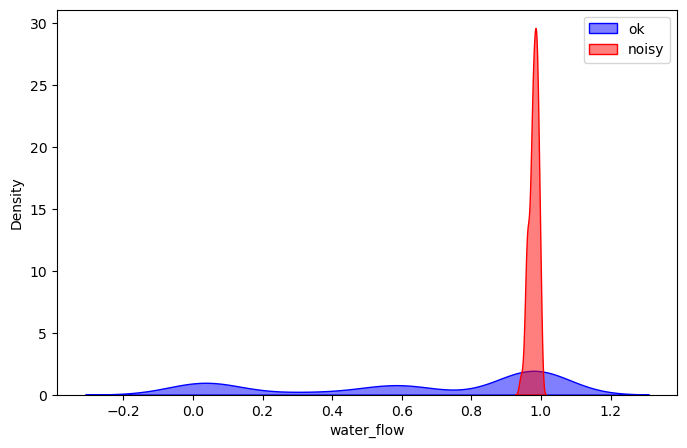

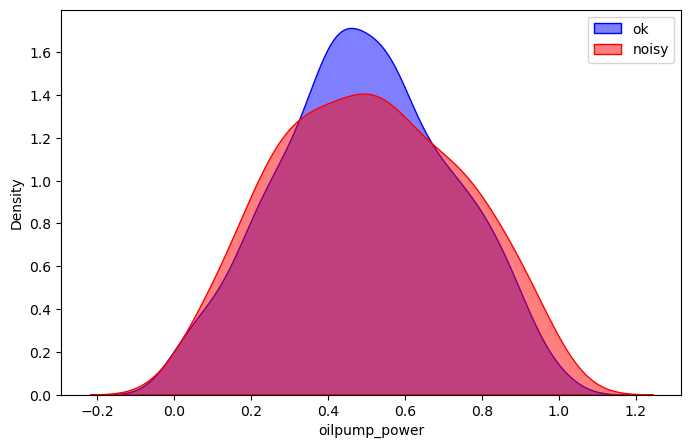

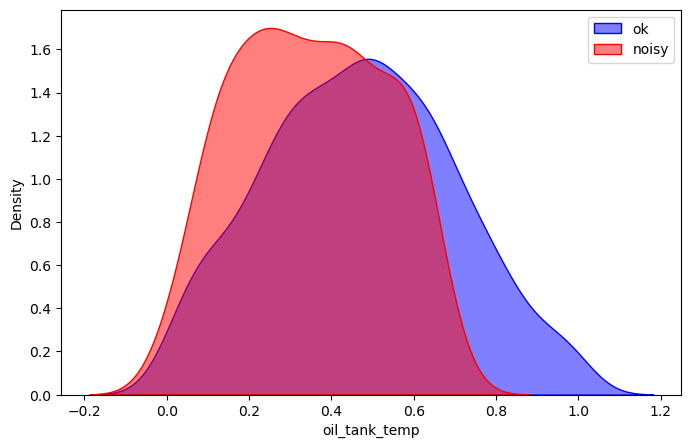

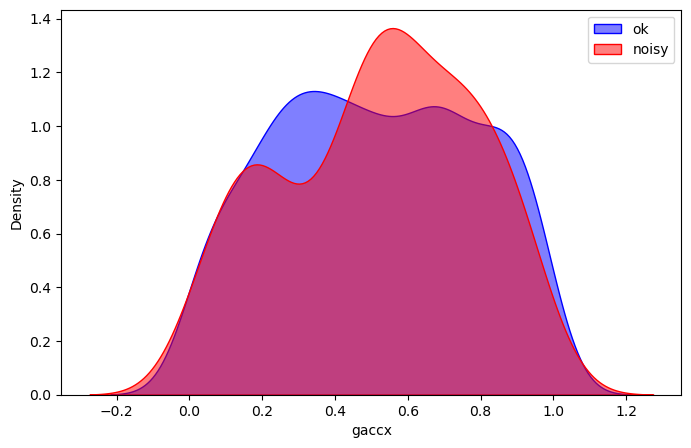

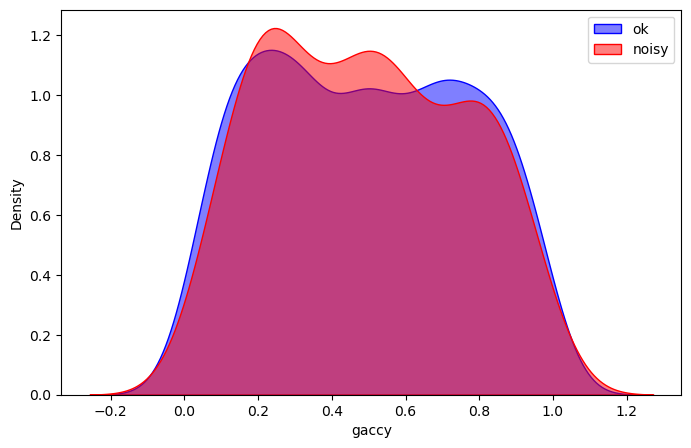

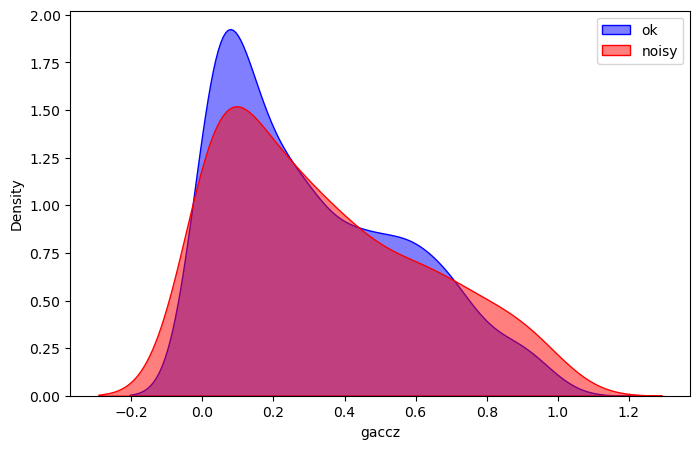

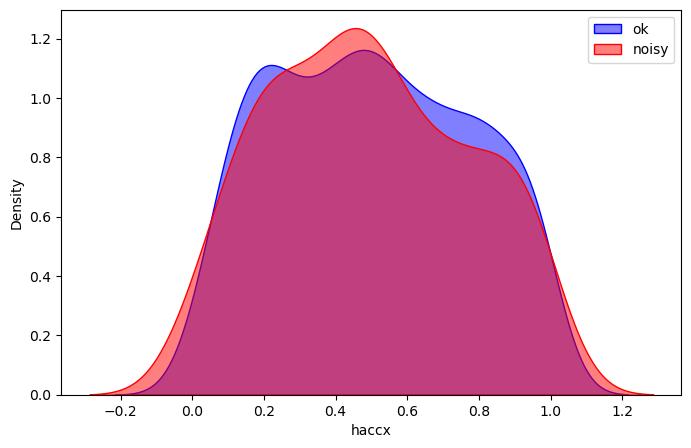

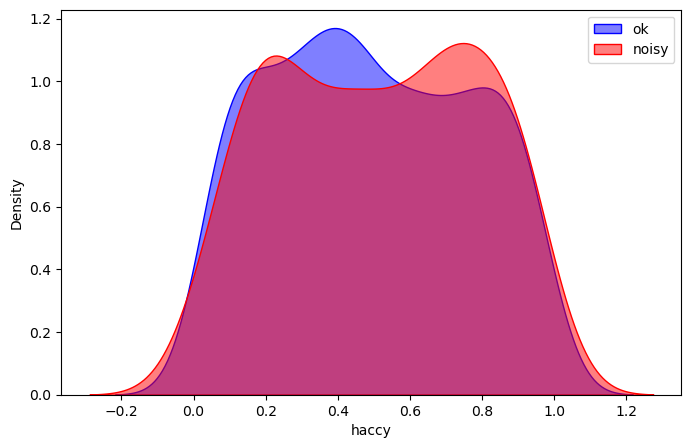

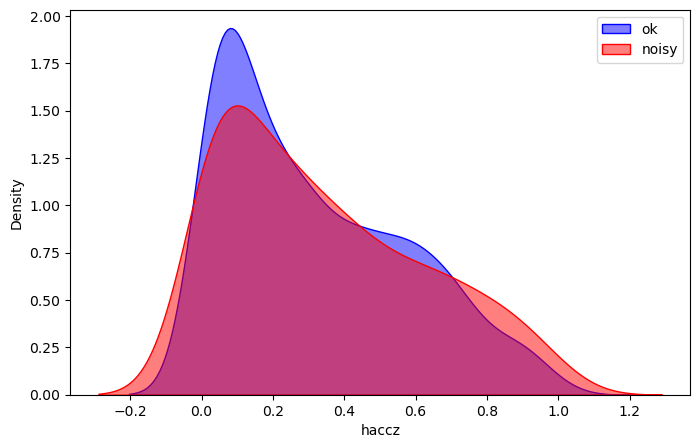

In [29]:
for col in df1.select_dtypes(include=['float']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(ok_bearings[col], label='ok', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(noisy_bearings[col], label='noisy', fill=True, alpha=0.5, color='red')
    plt.legend()
    plt.show()

In [30]:
df1.head()

rpm  motor_power    torque  outlet_pressure_bar  air_flow  noise_db  \
0  0.475     0.001037  0.013344             0.000000  1.000000  0.094399   
1  0.825     0.016673  0.065919             0.012448  0.997860  0.059419   
2  0.375     0.054568  0.102597             0.056708  0.995721  0.102062   
3  0.000     0.094082  0.146078             0.106193  0.993834  0.056152   
4  0.450     0.110337  0.173792             0.112341  0.993162  0.133005   

   outlet_temp  wpump_outlet_press  water_inlet_temp  water_outlet_temp  ...  \
0     0.032137            0.781025          0.000000           0.000000  ...   
1     0.000000            0.487007          0.079204           0.120984  ...   
2     0.012533            0.192989          0.116465           0.050572  ...   
3     0.061420            0.175473          0.070570           0.178321  ...   
4     0.043337            0.349796          0.139066           0.105729  ...   

      gaccz     haccx     haccy     haccz  bearings  wpump  radiator  exvalve  \
0  0.007141  0.594658  0.518492  0.009264        Ok     Ok     Clean    Clean   
1  0.010637  0.516156  0.242284  0.000668        Ok     Ok     Clean    Clean   
2  0.028913  0.514346  0.191371  0.019640        Ok     Ok     Clean    Clean   
3  0.047450  0.591095  0.829934  0.056453        Ok     Ok     Clean    Clean   
4  0.042710  0.473300  0.481610  0.043482        Ok     Ok     Clean    Clean   

      diagnostic  Machine_Model  
0  Sans problème              2  
1  Sans problème              2  
2  Sans problème              2  
3  Sans problème              2  
4  Sans problème              2  

[5 rows x 26 columns]

### Analyse plus détaillé

#### Analyse features/features

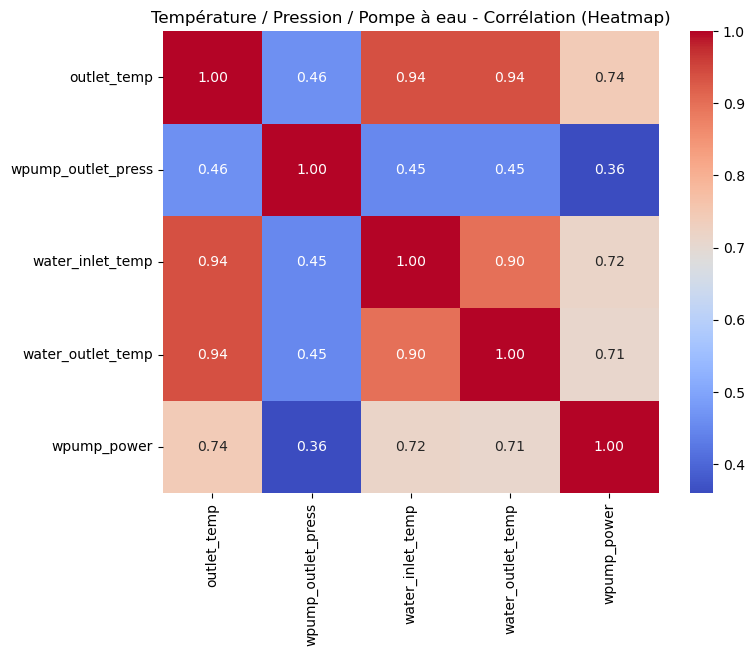

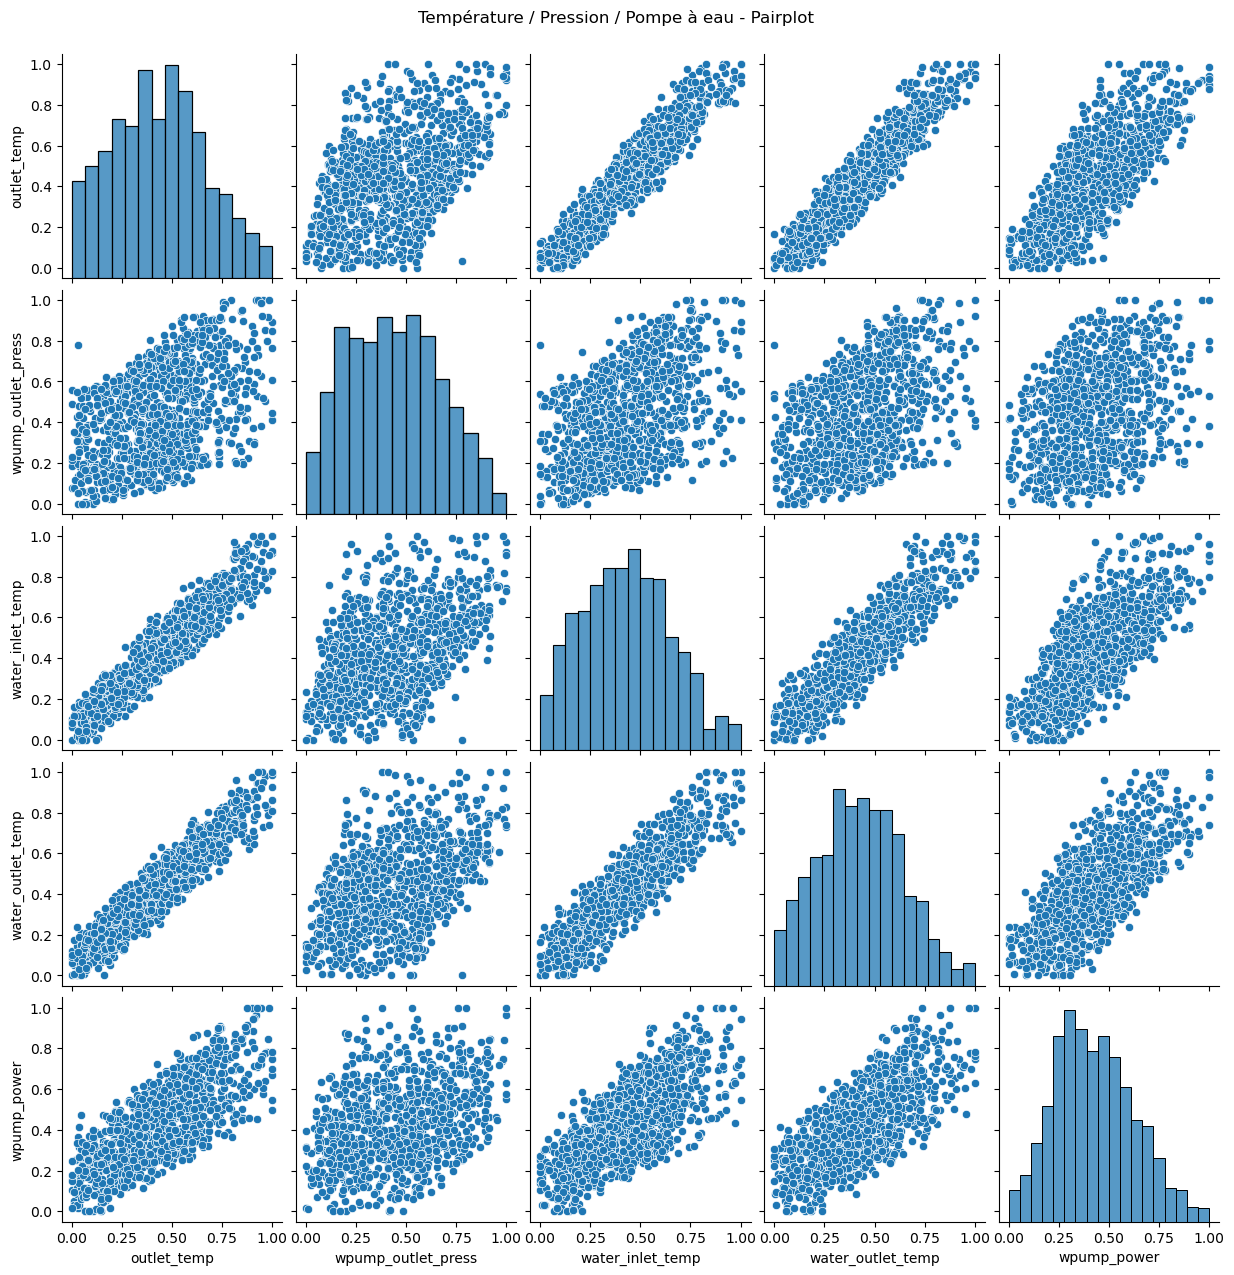

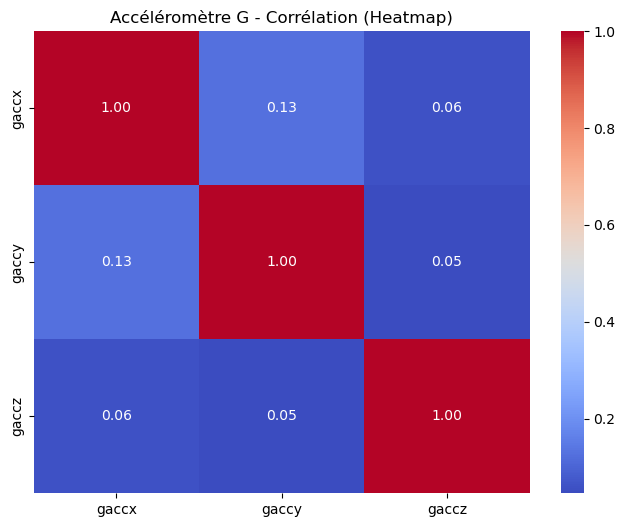

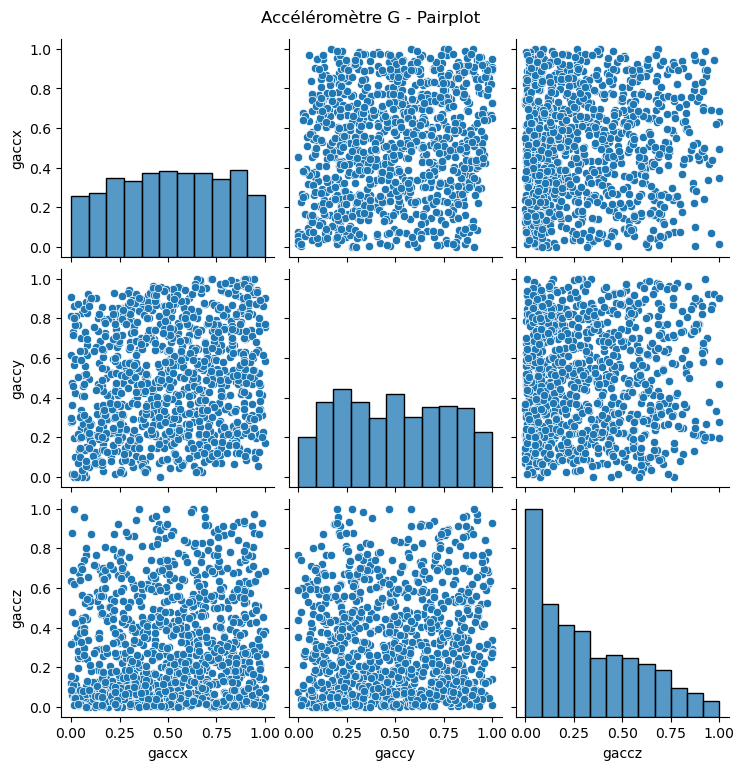

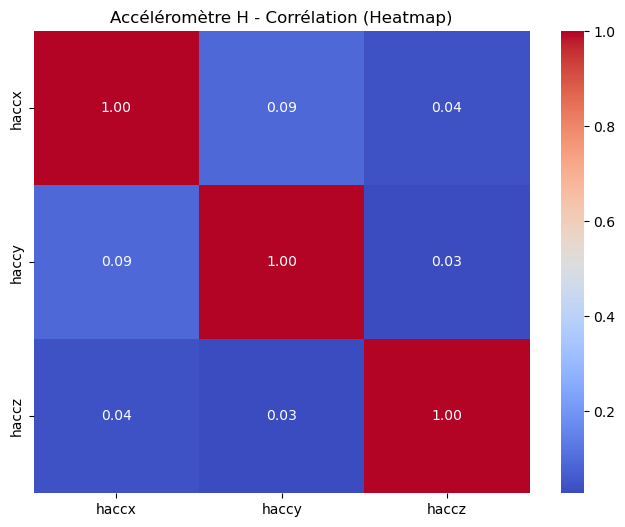

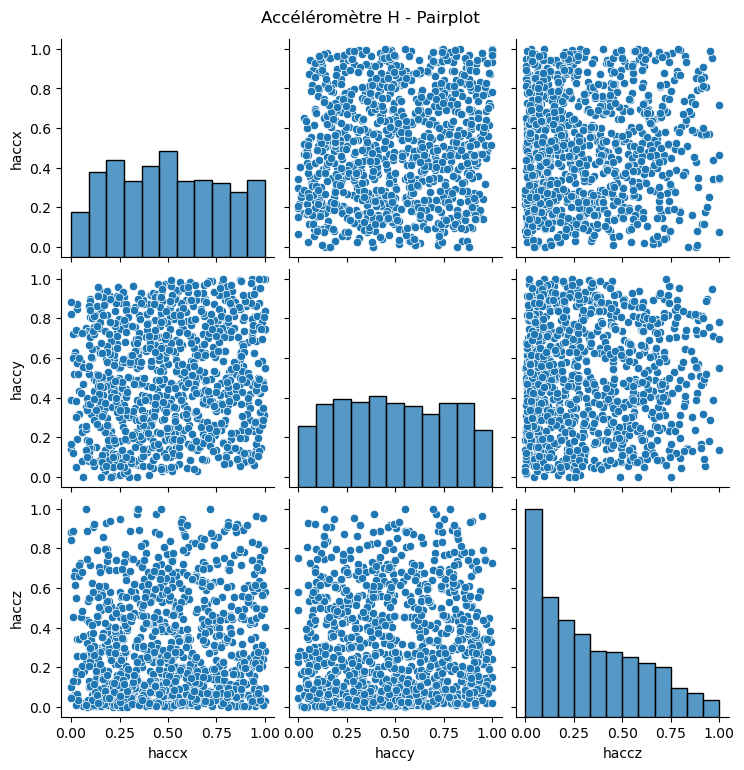

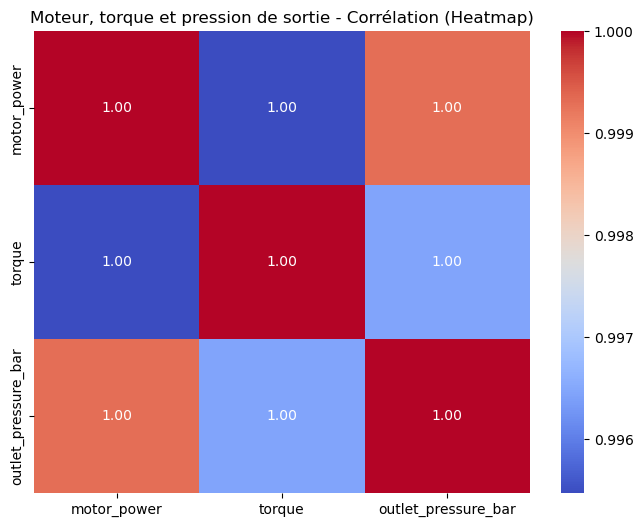

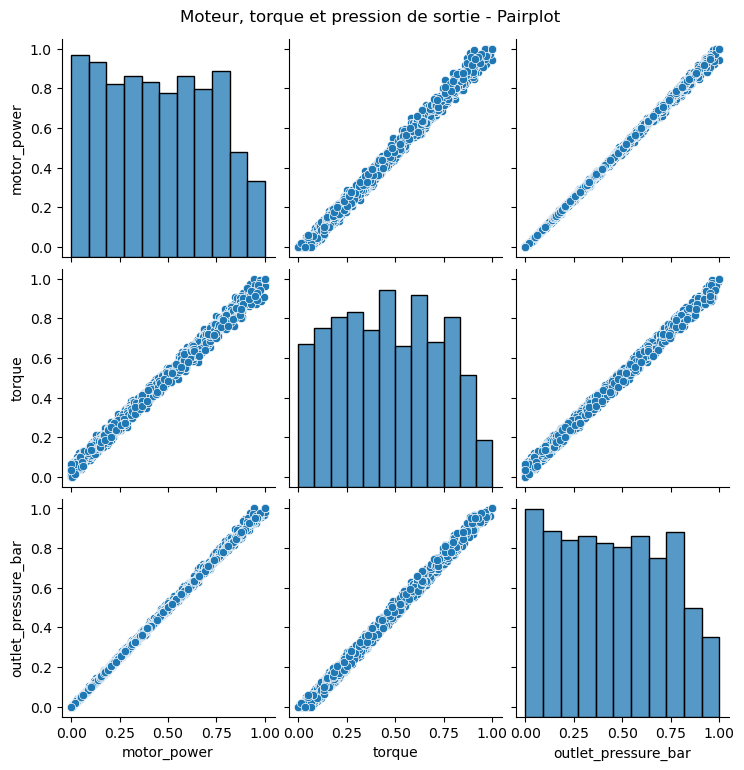

In [31]:
# === Sous-ensembles définis ===

# 1. Température, pression et puissance de la pompe à eau
subset_temp = ['outlet_temp', 'wpump_outlet_press', 'water_inlet_temp', 'water_outlet_temp', 'wpump_power']

# 2. Accéléromètre G (vibrations captées sur 3 axes)
subset_gacc = ['gaccx', 'gaccy', 'gaccz']

# 3. Accéléromètre H (autre capteur, 3 axes)
subset_hacc = ['haccx', 'haccy', 'haccz']

# 4. Moteur, torque et pression de sortie
subset_motor = ['motor_power','torque','outlet_pressure_bar']


# === Fonction d'analyse graphique ===

def plot_analysis(subset, title_prefix):
    subset_df = df1[subset]

    # Heatmap : montre les corrélations entre chaque paire de variables
    plt.figure(figsize=(8, 6))
    sns.heatmap(subset_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{title_prefix} - Corrélation (Heatmap)")
    plt.show()

    # Pairplot : scatterplots en 2D pour chaque paire, avec histogrammes
    sns.pairplot(subset_df)
    plt.suptitle(f"{title_prefix} - Pairplot", y=1.02)
    plt.show()


# === Lancer les visualisations pour chaque sous-ensemble ===

plot_analysis(subset_temp, "Température / Pression / Pompe à eau")
plot_analysis(subset_gacc, "Accéléromètre G")
plot_analysis(subset_hacc, "Accéléromètre H")
plot_analysis(subset_motor, "Moteur, torque et pression de sortie")


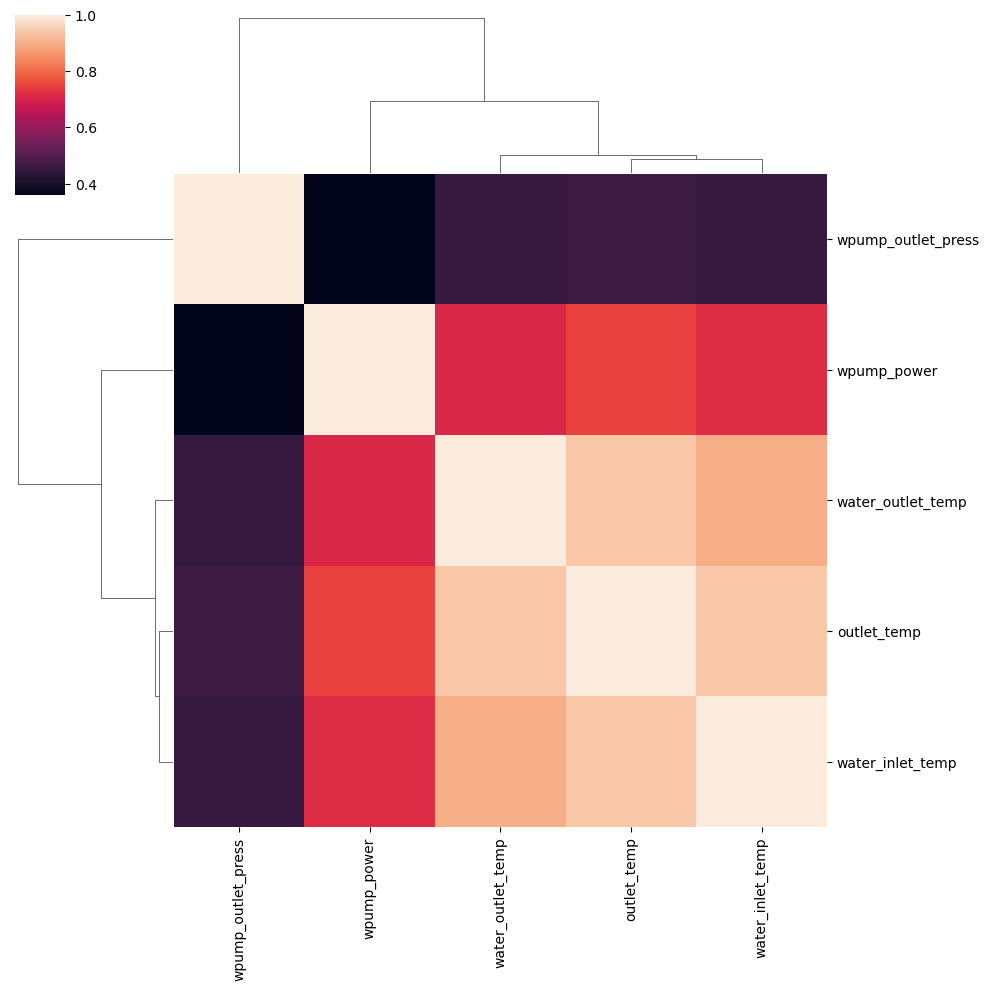

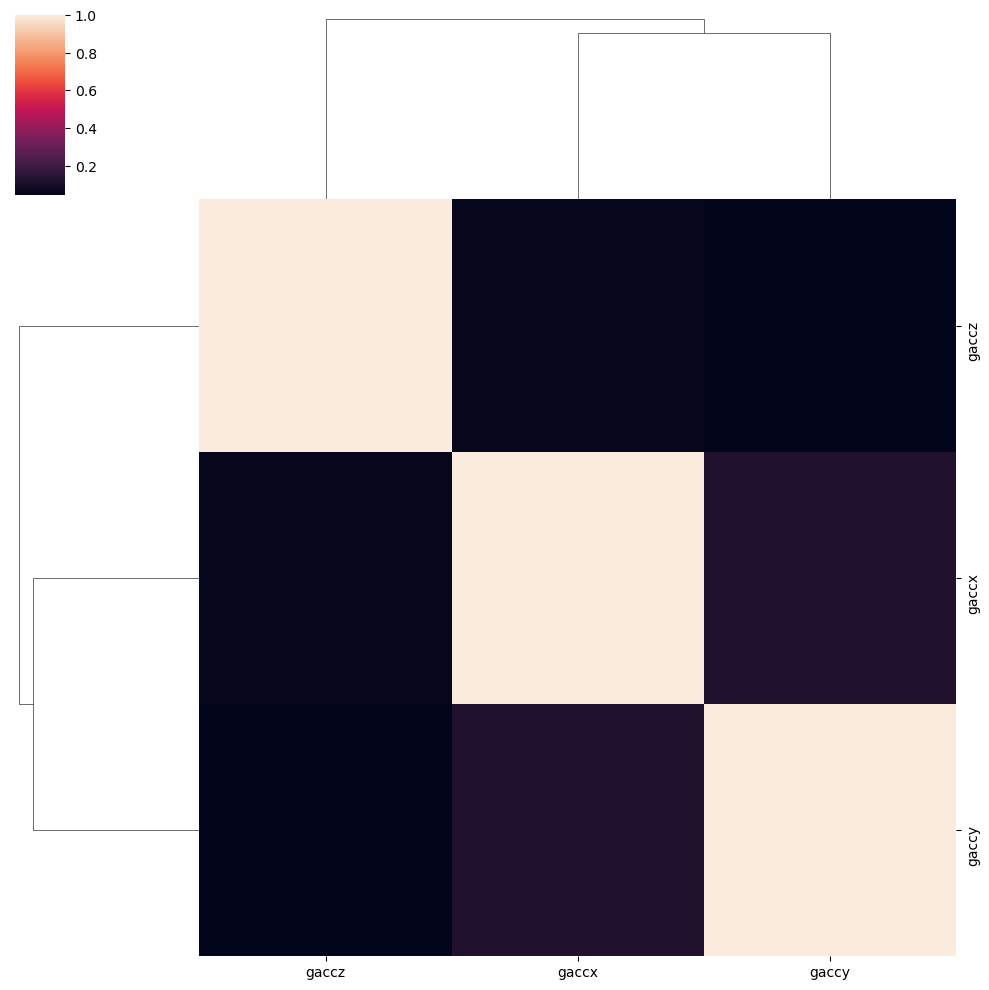

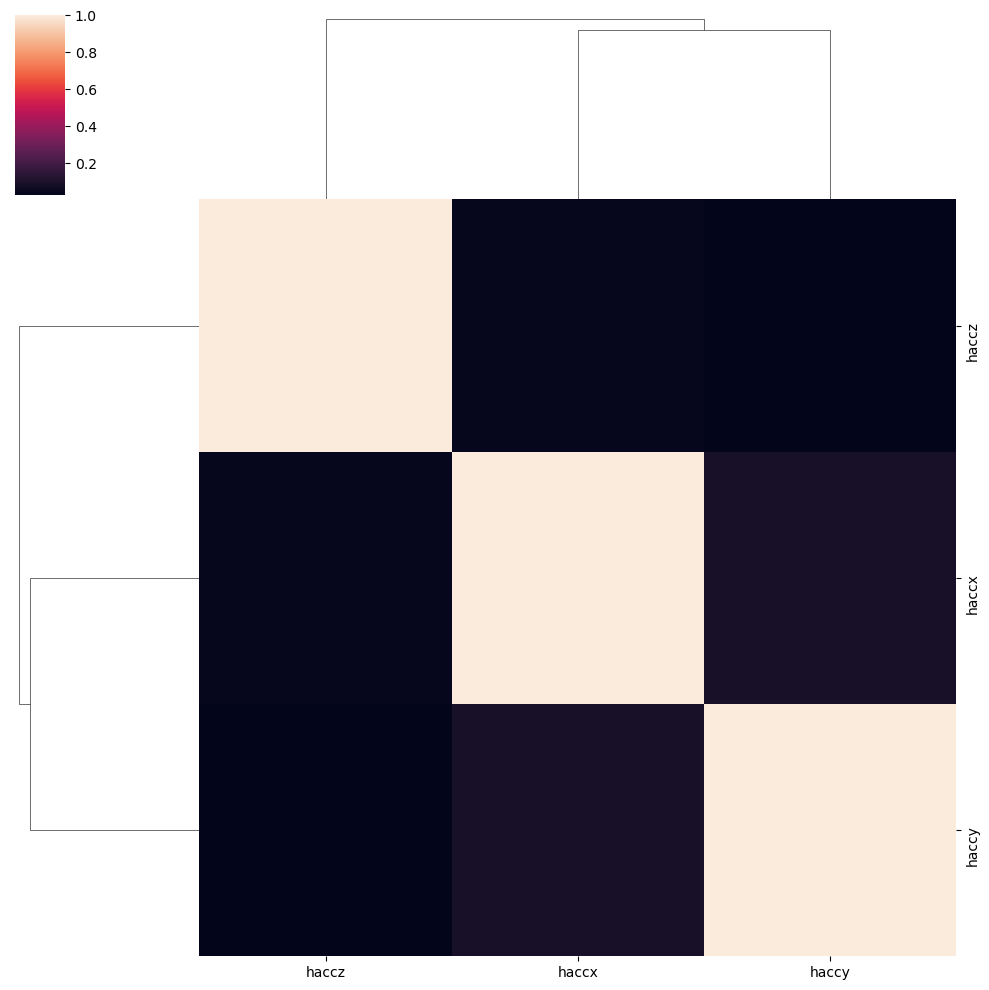

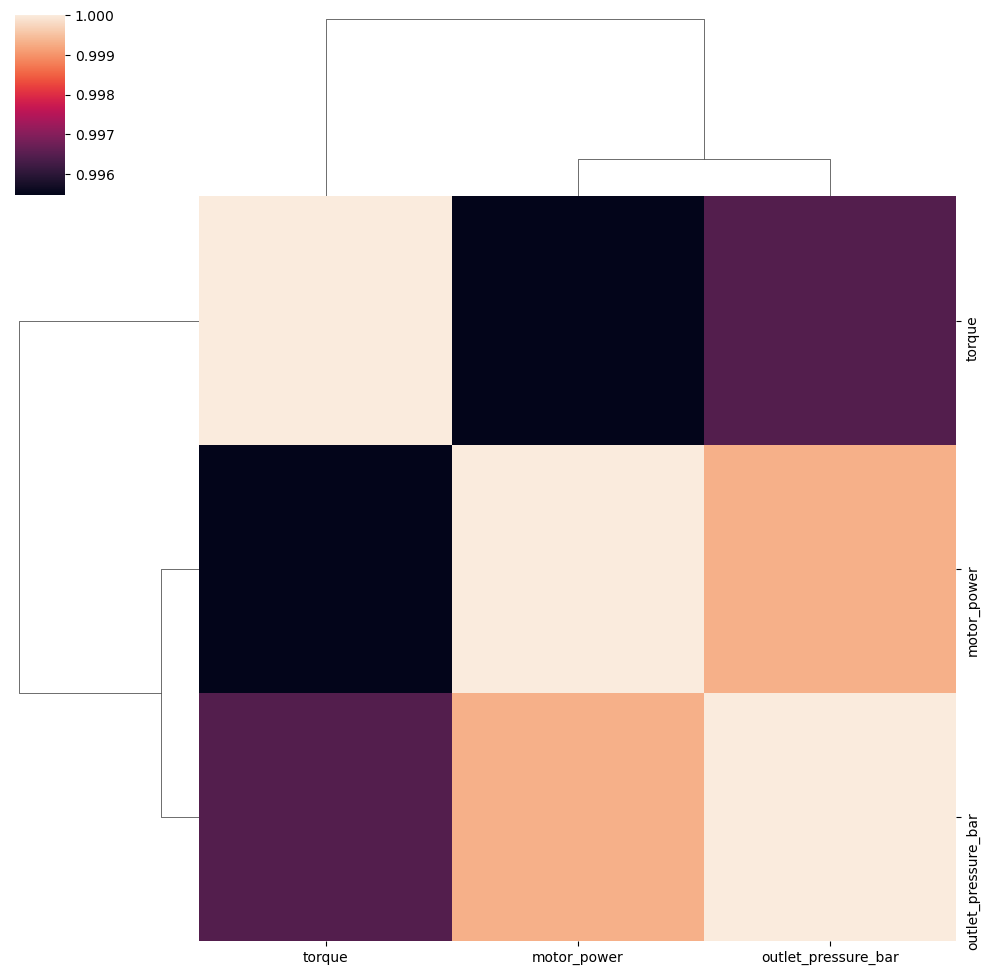

In [32]:
sns.clustermap(df1[subset_temp].corr())
sns.clustermap(df1[subset_gacc].corr())
sns.clustermap(df1[subset_hacc].corr())
sns.clustermap(df1[subset_motor].corr())

#### Hypothèse nulle

In [33]:
from scipy.stats import ttest_ind

In [34]:
clean_radiator_df = df1[df1['radiator'] == 'Clean']
dirty_radiator_df = df1[df1['radiator'] == 'Dirty']
clean_exvalve_df = df1[df1['exvalve'] == 'Clean']
dirty_exvalve_df = df1[df1['exvalve'] == 'Dirty']
ok_wpump_df = df1[df1['wpump'] == 'Ok']
noisy_wpump_df = df1[df1['wpump'] == 'Noisy']
ok_bearings_df = df1[df1['bearings'] == 'Ok']
noisy_bearings_df = df1[df1['bearings'] == 'Noisy']

In [35]:
print(clean_radiator_df.shape)
print(dirty_radiator_df.shape)
print(clean_exvalve_df.shape)
print(dirty_exvalve_df.shape)
print(ok_wpump_df.shape)
print(noisy_wpump_df.shape)
print(ok_bearings_df.shape)
print(noisy_bearings_df.shape)

(800, 26)
(200, 26)
(800, 26)
(200, 26)
(800, 26)
(200, 26)
(800, 26)
(200, 26)


In [36]:
balanced_clean_radiator = clean_radiator_df.sample(dirty_radiator_df.shape[0])
balanced_clean_exvalve = clean_exvalve_df.sample(dirty_exvalve_df.shape[0])
balanced_ok_wpump = ok_wpump_df.sample(noisy_wpump_df.shape[0])
balanced_ok_bearings = ok_bearings_df.sample(noisy_bearings_df.shape[0])

In [37]:
def t_test(col, balance, positive):
    alpha = 0.05
    stat, p = ttest_ind(balance[col].dropna() ,positive[col].dropna())
    if p < alpha :
        return 'H0 Rejetée'
    else :
        return 0

In [38]:
print('\nTest radiator :')
for col in df1.select_dtypes(include=['float']):
    print(f'{col:-<50} {t_test(col, balanced_clean_radiator, clean_radiator_df)}')
print('\nTest exvalve :')
for col in df1.select_dtypes(include=['float']):
    print(f'{col:-<50} {t_test(col, balanced_clean_exvalve, clean_exvalve_df)}')
print('\nTest wpump :')
for col in df1.select_dtypes(include=['float']):
    print(f'{col:-<50} {t_test(col, balanced_ok_wpump, ok_wpump_df)}')
print('\nTest bearings :')
for col in df1.select_dtypes(include=['float']):
    print(f'{col:-<50} {t_test(col, balanced_ok_bearings, ok_bearings_df)}')


Test radiator :
rpm----------------------------------------------- 0
motor_power--------------------------------------- 0
torque-------------------------------------------- 0
outlet_pressure_bar------------------------------- 0
air_flow------------------------------------------ 0
noise_db------------------------------------------ 0
outlet_temp--------------------------------------- 0
wpump_outlet_press-------------------------------- 0
water_inlet_temp---------------------------------- 0
water_outlet_temp--------------------------------- 0
wpump_power--------------------------------------- 0
water_flow---------------------------------------- 0
oilpump_power------------------------------------- 0
oil_tank_temp------------------------------------- 0
gaccx--------------------------------------------- 0
gaccy--------------------------------------------- 0
gaccz--------------------------------------------- 0
haccx--------------------------------------------- 0
haccy------------------------

## Pre-Processing

In [82]:
df2 = data.copy()
df2.head()

id  rpm  motor_power     torque  outlet_pressure_bar    air_flow  \
0   1  499  1405.842858  27.511708                1.000  308.289879   
1   2  513  1457.370092  31.030115                1.081  307.833736   
2   3  495  1582.249959  33.484653                1.369  307.377593   
3   4  480  1712.466820  36.394475                1.691  306.975248   
4   5  498  1766.035170  38.249154                1.731  306.832132   

    noise_db  outlet_temp  wpump_outlet_press  water_inlet_temp  ...  \
0  40.840517    78.554715            2.960632         43.166392  ...   
1  40.484226    76.902822            2.536711         47.342143  ...   
2  40.918572    77.547021            2.112789         49.306593  ...   
3  40.450953    80.059949            2.087534         46.886933  ...   
4  41.233739    79.130424            2.338877         50.498100  ...   

      gaccy     gaccz     haccx     haccy     haccz  bearings  wpump  \
0  0.383773  2.649801  1.213344  1.409218  2.962484        Ok     Ok   
1  0.450954  2.669423  1.210674  1.379050  2.938135        Ok     Ok   
2  0.443924  2.772009  1.210612  1.373490  2.991878        Ok     Ok   
3  0.370457  2.876056  1.213223  1.443234  3.096158        Ok     Ok   
4  0.383868  2.849451  1.209216  1.405190  3.059417        Ok     Ok   

   radiator  exvalve  acmotor  
0     Clean    Clean   Stable  
1     Clean    Clean   Stable  
2     Clean    Clean   Stable  
3     Clean    Clean   Stable  
4     Clean    Clean   Stable  

[5 rows x 26 columns]

In [83]:
df2 = df2.drop(['id', 'acmotor'], axis=1)

In [84]:
df2.head()

rpm  motor_power     torque  outlet_pressure_bar    air_flow   noise_db  \
0  499  1405.842858  27.511708                1.000  308.289879  40.840517   
1  513  1457.370092  31.030115                1.081  307.833736  40.484226   
2  495  1582.249959  33.484653                1.369  307.377593  40.918572   
3  480  1712.466820  36.394475                1.691  306.975248  40.450953   
4  498  1766.035170  38.249154                1.731  306.832132  41.233739   

   outlet_temp  wpump_outlet_press  water_inlet_temp  water_outlet_temp  ...  \
0    78.554715            2.960632         43.166392          47.259238  ...   
1    76.902822            2.536711         47.342143          55.025653  ...   
2    77.547021            2.112789         49.306593          50.505622  ...   
3    80.059949            2.087534         46.886933          58.706376  ...   
4    79.130424            2.338877         50.498100          54.046362  ...   

      gaccx     gaccy     gaccz     haccx     haccy     haccz  bearings  \
0  0.711820  0.383773  2.649801  1.213344  1.409218  2.962484        Ok   
1  0.704667  0.450954  2.669423  1.210674  1.379050  2.938135        Ok   
2  0.704828  0.443924  2.772009  1.210612  1.373490  2.991878        Ok   
3  0.726604  0.370457  2.876056  1.213223  1.443234  3.096158        Ok   
4  0.707785  0.383868  2.849451  1.209216  1.405190  3.059417        Ok   

   wpump  radiator  exvalve  
0     Ok     Clean    Clean  
1     Ok     Clean    Clean  
2     Ok     Clean    Clean  
3     Ok     Clean    Clean  
4     Ok     Clean    Clean  

[5 rows x 24 columns]

### TrainTest - Nettoyage - Encodage

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
trainset, testset = train_test_split(df2, test_size=0.2, random_state=0)

In [87]:
def encodage(df):
    code = {'Clean':1,
           'Dirty':0,
           'Ok':1,
           'Noisy':0
           }
    
    for col in df.select_dtypes('object'):
        df[col] = df[col].map(code)

    return df

In [88]:
df2.dtypes.value_counts()

float64    19
object      4
int64       1
Name: count, dtype: int64

In [89]:
def imputation(df):
    df = df.dropna(axis=0)
    return df

In [90]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

def normalization(df):
    # Appliquer KMeans pour regrouper en 5 clusters
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
    df['Machine_Model'] = kmeans.fit_predict(df[['rpm']])
    
    # Identifier les colonnes numériques à normaliser
    num_cols = ['rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow', 'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
                'water_outlet_temp', 'wpump_power','water_flow', 'oilpump_power', 'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx',
               'haccy', 'haccz']  # Adapter selon ton dataset
    
    df[num_cols] = df[num_cols].astype(float)
    
    # Standardisation par modèle de machine
    scaler = MinMaxScaler()
    
    for model in df['Machine_Model'].unique():  
        mask = df['Machine_Model'] == model  # Filtrer les lignes correspondant à ce modèle
        df.loc[mask, num_cols] = scaler.fit_transform(df.loc[mask, num_cols])  # Appliquer le MinMaxScaler

    return df

In [91]:
def preprocessing(df):
    df = normalization(df)
    df = encodage(df)
    df = imputation(df)
    X =  df.drop(['bearings', 'wpump', 'exvalve', 'radiator'], axis=1)
    y = df[['bearings', 'wpump', 'exvalve', 'radiator']]
    print(y.value_counts())
    
    return X, y

In [92]:
X_train, y_train = preprocessing(trainset)

bearings  wpump  exvalve  radiator
1         1      1        0           167
                          1           162
          0      1        1           159
0         1      1        1           157
1         1      0        1           155
Name: count, dtype: int64


C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [93]:
X_test, y_test = preprocessing(testset)

bearings  wpump  exvalve  radiator
1         1      0        1           45
0         1      1        1           43
1         0      1        1           41
          1      1        1           38
                          0           33
Name: count, dtype: int64


C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Modelisation

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [152]:
model1 = make_pipeline(PolynomialFeatures(2, include_bias=False), 
                       MultiOutputClassifier(RandomForestClassifier(max_depth=2, warm_start=True)))

In [149]:
model1_1 = make_pipeline(PolynomialFeatures(2, include_bias=False), 
                       MultiOutputClassifier(LinearSVC(C=0.1, max_iter=2000, penalty='l1',
                                          tol=1e-05)))

In [128]:
model1_2 = make_pipeline(PolynomialFeatures(2, include_bias=False),
                        MultiOutputClassifier(SVC(C=0.001, coef0=0.5, degree=2, gamma=1,
                                    kernel='poly', probability=True)))

In [169]:
model1_3 = make_pipeline(PolynomialFeatures(2, include_bias=False),
                        MultiOutputClassifier(LogisticRegression(C=1, max_iter=500)))

In [176]:
model1_4 = make_pipeline(PolynomialFeatures(2, include_bias=False),
                        MultiOutputClassifier(KNeighborsClassifier(p=1)))

In [189]:
model1_5 = make_pipeline(PolynomialFeatures(2, include_bias=False),
                        MultiOutputClassifier(DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=2)))

In [209]:
model1_6 = make_pipeline(PolynomialFeatures(2, include_bias=False),
                        MultiOutputClassifier(ExtraTreesClassifier(n_estimators=200, max_depth=4)))

In [219]:
model1_7 = make_pipeline(PolynomialFeatures(2, include_bias=False),
                        MultiOutputClassifier(XGBClassifier(max_depth=2,min_child_weight=10, learning_rate=0.01,
                                                           gamma=0, colsample_bytree=0.7)))

### Procédure d'évaluation

In [54]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [55]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    y_pred_df = pd.DataFrame(ypred, columns=y_test.columns, index=X_test.index)

    # Rapport multilabel
    print(classification_report(y_test, y_pred_df, zero_division=0, target_names=y_test.columns))

    N, train_score, val_score = learning_curve(
        model, X_train, y_train,
        cv=4, scoring='f1_macro',  # macro pour multilabel
        train_sizes=np.linspace(0.1, 1, 10)
    )

    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.title("Courbes d'apprentissage (F1-macro)")
    plt.grid(True)
    plt.show()

              precision    recall  f1-score   support

    bearings       0.98      1.00      0.99       157
       wpump       0.90      1.00      0.95       159
     exvalve       1.00      1.00      1.00       155
    radiator       1.00      1.00      1.00       167

   micro avg       0.97      1.00      0.98       638
   macro avg       0.97      1.00      0.98       638
weighted avg       0.97      1.00      0.98       638
 samples avg       0.97      1.00      0.98       638



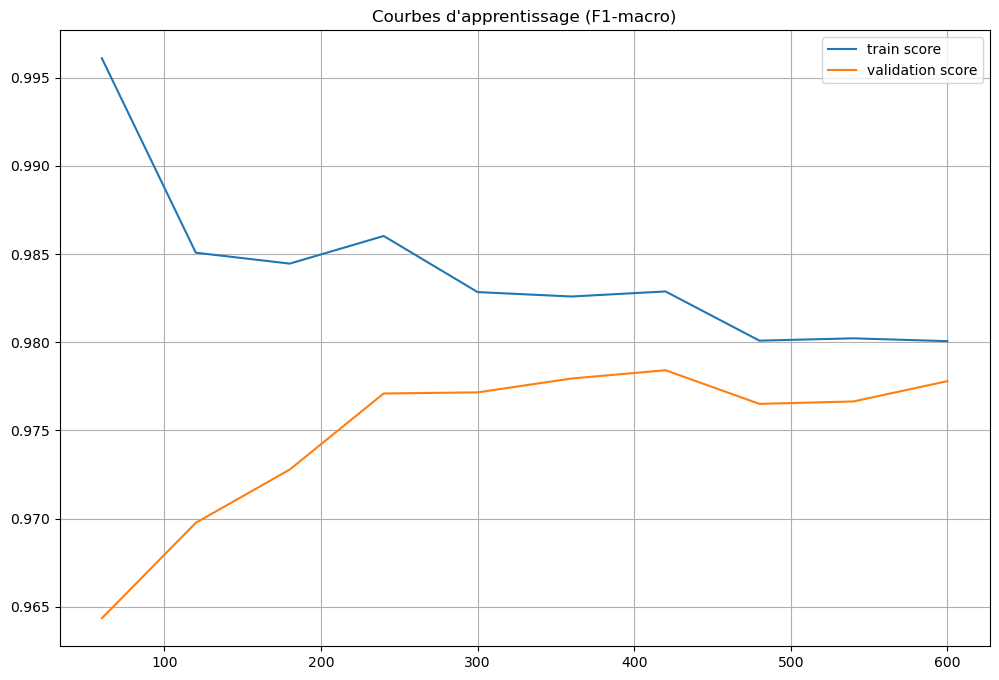

In [153]:
evaluation(model1)

C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

    bearings       0.99      1.00      1.00       157
       wpump       1.00      1.00      1.00       159
     exvalve       1.00      1.00      1.00       155
    radiator       1.00      0.97      0.98       167

   micro avg       1.00      0.99      1.00       638
   macro avg       1.00      0.99      1.00       638
weighted avg       1.00      0.99      1.00       638
 samples avg       1.00      0.99      0.99       638



C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinea

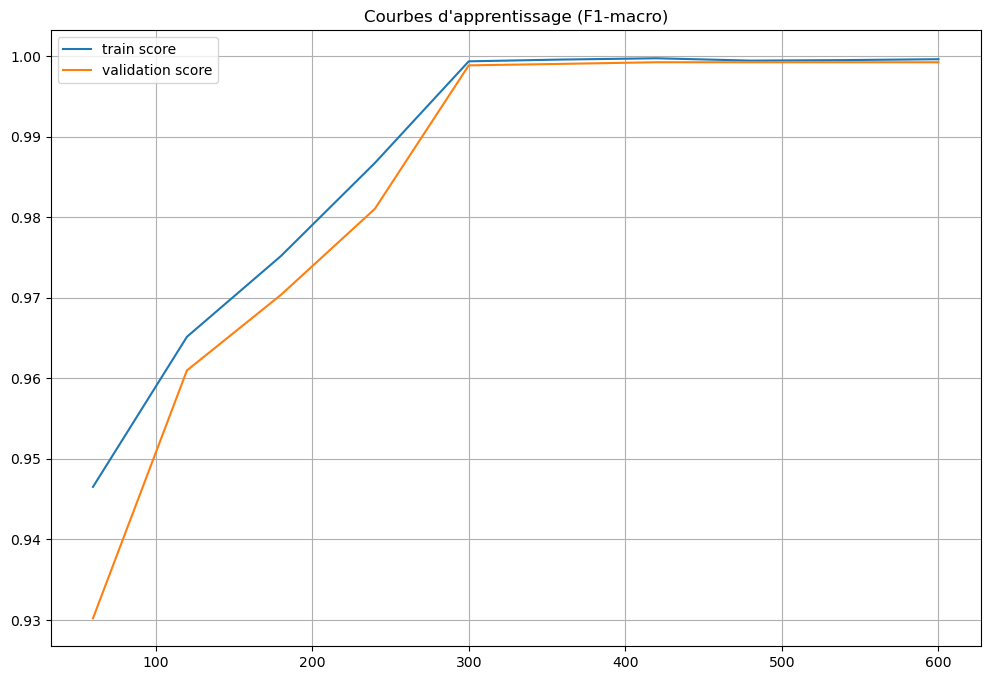

In [150]:
evaluation(model1_1)

              precision    recall  f1-score   support

    bearings       0.98      1.00      0.99       157
       wpump       0.96      0.99      0.98       159
     exvalve       1.00      1.00      1.00       155
    radiator       1.00      0.99      1.00       167

   micro avg       0.99      1.00      0.99       638
   macro avg       0.99      1.00      0.99       638
weighted avg       0.99      1.00      0.99       638
 samples avg       0.99      1.00      0.99       638



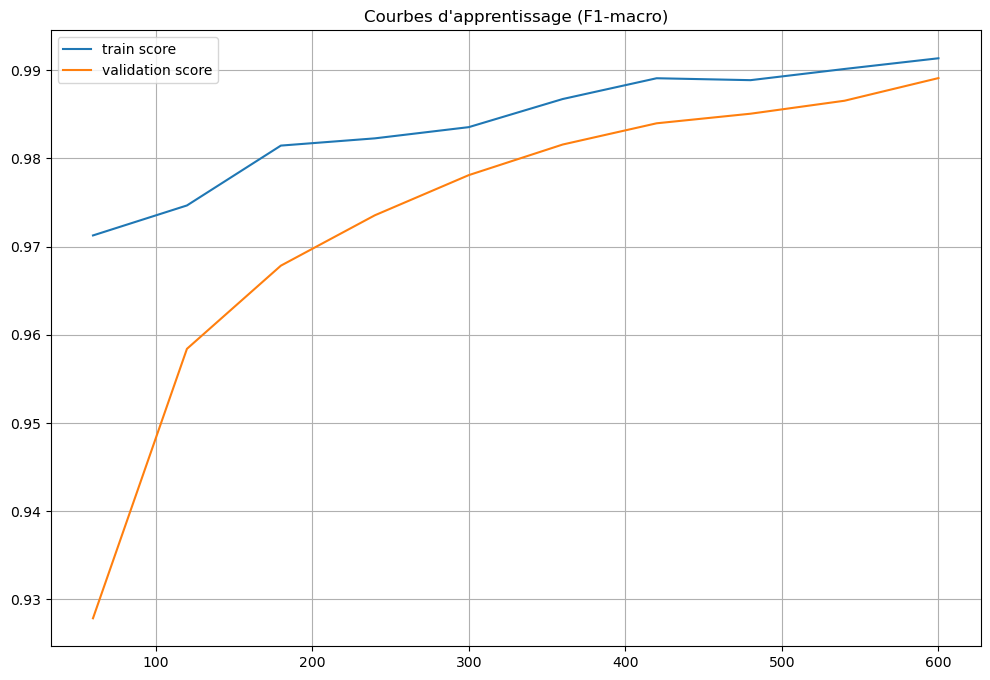

In [129]:
evaluation(model1_2)

              precision    recall  f1-score   support

    bearings       0.99      1.00      0.99       157
       wpump       1.00      0.99      1.00       159
     exvalve       1.00      1.00      1.00       155
    radiator       1.00      0.99      1.00       167

   micro avg       1.00      1.00      1.00       638
   macro avg       1.00      1.00      1.00       638
weighted avg       1.00      1.00      1.00       638
 samples avg       1.00      1.00      1.00       638



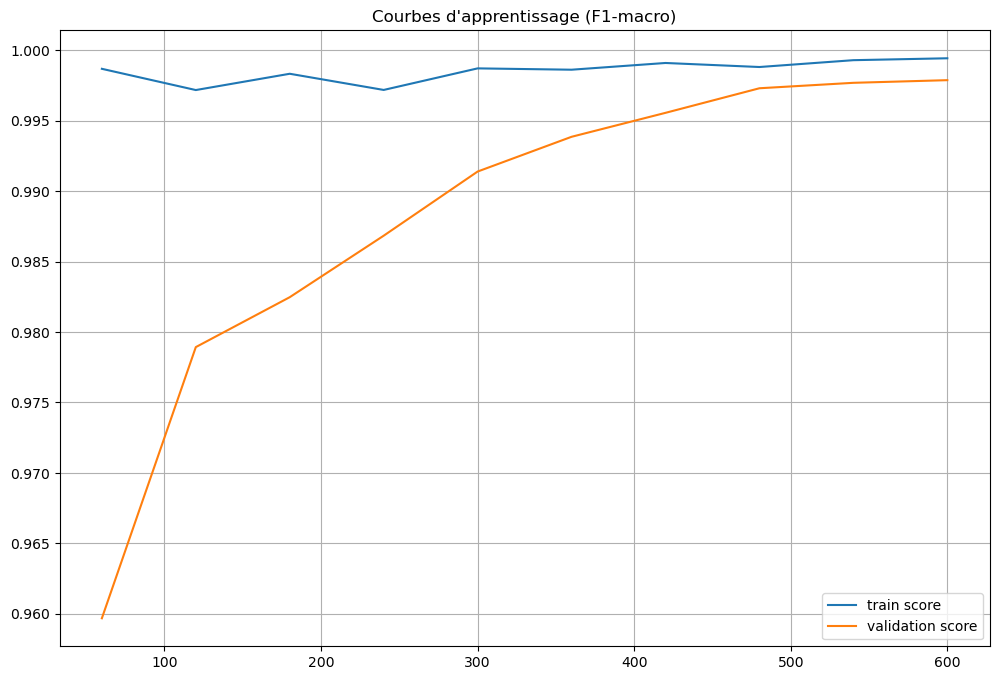

In [170]:
evaluation(model1_3)

              precision    recall  f1-score   support

    bearings       0.95      0.99      0.97       157
       wpump       0.95      0.97      0.96       159
     exvalve       1.00      1.00      1.00       155
    radiator       0.99      0.98      0.98       167

   micro avg       0.97      0.98      0.98       638
   macro avg       0.97      0.98      0.98       638
weighted avg       0.97      0.98      0.98       638
 samples avg       0.98      0.99      0.98       638



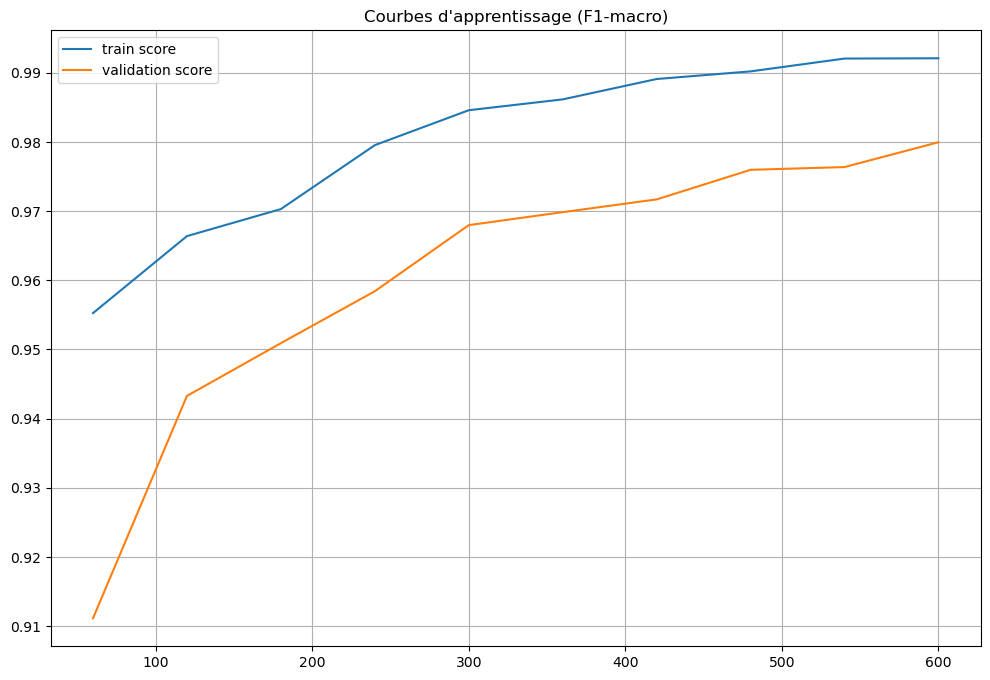

In [177]:
evaluation(model1_4)

              precision    recall  f1-score   support

    bearings       0.99      1.00      0.99       157
       wpump       1.00      1.00      1.00       159
     exvalve       1.00      1.00      1.00       155
    radiator       1.00      1.00      1.00       167

   micro avg       1.00      1.00      1.00       638
   macro avg       1.00      1.00      1.00       638
weighted avg       1.00      1.00      1.00       638
 samples avg       1.00      1.00      1.00       638



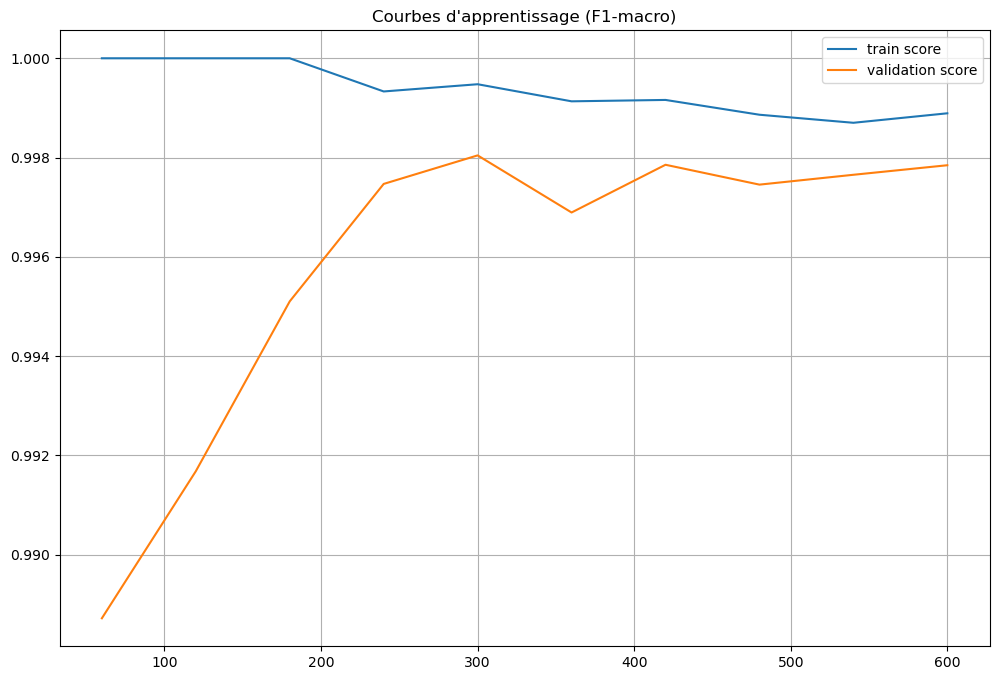

In [190]:
evaluation(model1_5)

              precision    recall  f1-score   support

    bearings       0.98      1.00      0.99       157
       wpump       0.96      1.00      0.98       159
     exvalve       1.00      1.00      1.00       155
    radiator       1.00      1.00      1.00       167

   micro avg       0.98      1.00      0.99       638
   macro avg       0.98      1.00      0.99       638
weighted avg       0.98      1.00      0.99       638
 samples avg       0.99      1.00      0.99       638



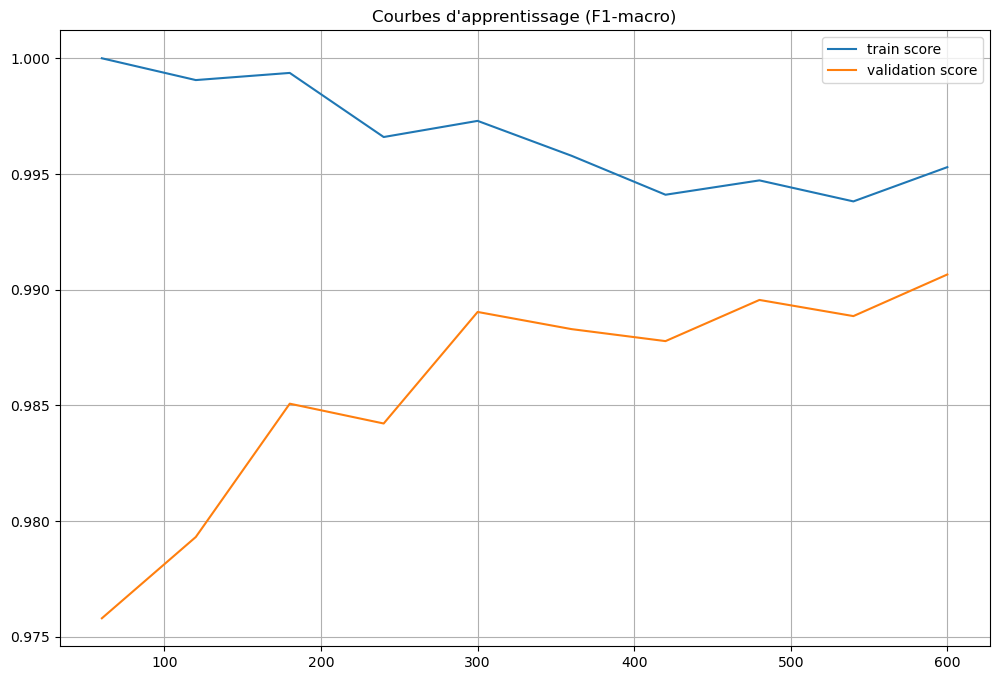

In [203]:
evaluation(model1_6)

              precision    recall  f1-score   support

    bearings       0.99      1.00      0.99       157
       wpump       1.00      1.00      1.00       159
     exvalve       1.00      1.00      1.00       155
    radiator       1.00      0.99      1.00       167

   micro avg       1.00      1.00      1.00       638
   macro avg       1.00      1.00      1.00       638
weighted avg       1.00      1.00      1.00       638
 samples avg       1.00      1.00      1.00       638



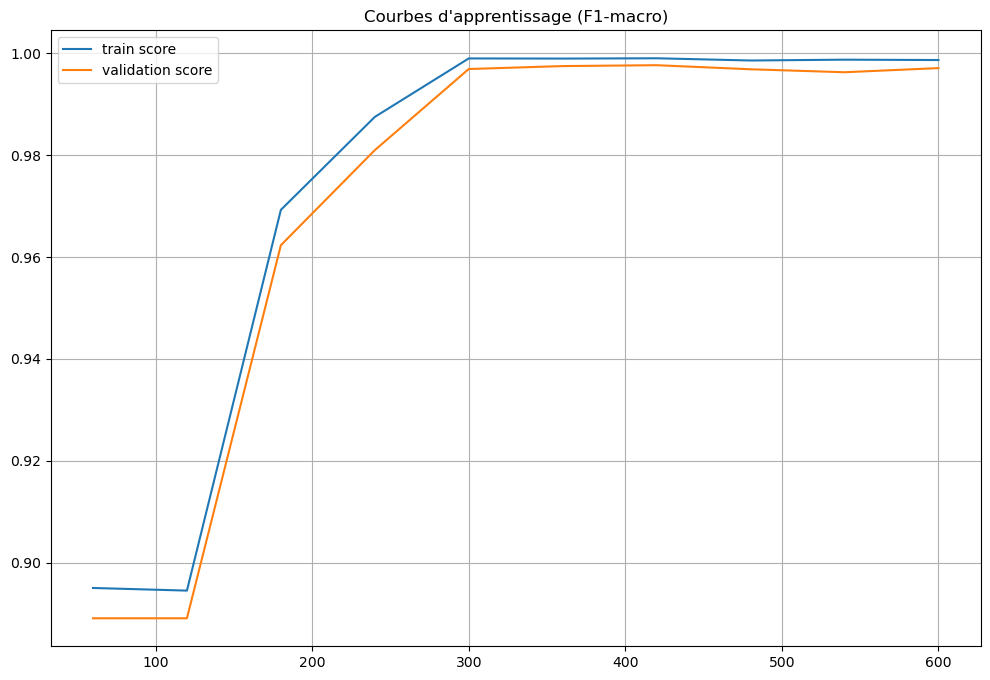

In [220]:
evaluation(model1_7)

### Fine-tuning

#### Model 1

In [151]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator__n_estimators': [100, 200, 300, 500],
    'estimator__criterion': ['gini', 'entropy', 'log_loss'],
    'estimator__max_depth': [None, 2, 3, 10, 20, 30],
    'estimator__min_samples_split': [2, 10, 20],
    'estimator__max_features' : ['auto', 'sqrt', 'log2', 10],
    'estimator__warm_start' : [True, False]
}
search = GridSearchCV(MultiOutputClassifier(RandomForestClassifier()), param_grid, cv=3, scoring='f1_micro')
search.fit(X_train, y_train)

C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1296 fits failed out of a total of 5184.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1296 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\multioutput.py", line 543, in fit
    super().fit(X, Y, sample_weight=sample_weight, **fit_params)
  File "C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estim

GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=RandomForestClassifier()),
             param_grid={'estimator__criterion': ['gini', 'entropy',
                                                  'log_loss'],
                         'estimator__max_depth': [None, 2, 3, 10, 20, 30],
                         'estimator__max_features': ['auto', 'sqrt', 'log2',
                                                     10],
                         'estimator__min_samples_split': [2, 10, 20],
                         'estimator__n_estimators': [100, 200, 300, 500],
                         'estimator__warm_start': [True, False]},
             scoring='f1_micro')

#### Model 1_1

In [140]:
param_grid = {
    'estimator__penalty' : ['l1', 'l2'],
    'estimator__C' : [0.1,1,10,100],
    'estimator__loss' : ['hinge', 'squared_hinge'],
    'estimator__max_iter' : [1000, 2000, 5000, 8000, 9000, 10000],
    'estimator__tol' : [1e-4, 1e-5, 1e-6],
}
search = GridSearchCV(MultiOutputClassifier(LinearSVC()), param_grid, cv=3, scoring='f1_micro')
search.fit(X_train, y_train)

C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinea

GridSearchCV(cv=3, estimator=MultiOutputClassifier(estimator=LinearSVC()),
             param_grid={'estimator__C': [0.1, 1, 10, 100],
                         'estimator__loss': ['hinge', 'squared_hinge'],
                         'estimator__max_iter': [1000, 2000, 5000, 8000, 9000,
                                                 10000],
                         'estimator__penalty': ['l1', 'l2'],
                         'estimator__tol': [0.0001, 1e-05, 1e-06]},
             scoring='f1_micro')

#### Model 1_2

In [117]:
param_grid = {
    'estimator__probability' : [True, False], 
    'estimator__kernel' : ['rbf', 'linear', 'poly', 'sigmoid'],
    'estimator__gamma' : ['scale', 'auto', 0.01,0.1,1,10],
    'estimator__C' : [0.01, 0.1, 1],
    'estimator__degree' : [2,3,4,5],
    'estimator__coef0' : [0.0,0.1,0.5],
    'estimator__shrinking' : [True, False]
    }

search = GridSearchCV(MultiOutputClassifier(SVC()), param_grid, cv=3, scoring='f1_micro')
search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MultiOutputClassifier(estimator=SVC()),
             param_grid={'estimator__C': [0.01, 0.1, 1],
                         'estimator__coef0': [0.0, 0.1, 0.5],
                         'estimator__degree': [2, 3, 4, 5],
                         'estimator__gamma': ['scale', 'auto', 0.01, 0.1, 1,
                                              10],
                         'estimator__kernel': ['rbf', 'linear', 'poly',
                                               'sigmoid'],
                         'estimator__probability': [True, False],
                         'estimator__shrinking': [True, False]},
             scoring='f1_micro')

#### Model 1_3

In [164]:
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10],
    'estimator__penalty': ['l2'],
    'estimator__solver': ['liblinear', 'lbfgs'],
    'estimator__max_iter': [100, 300, 1000]
    }

search = GridSearchCV(MultiOutputClassifier(LogisticRegression()), param_grid, cv=3, scoring='f1_micro')
search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=LogisticRegression()),
             param_grid={'estimator__C': [0.01, 0.1, 1, 10],
                         'estimator__max_iter': [100, 300, 1000],
                         'estimator__penalty': ['l2'],
                         'estimator__solver': ['liblinear', 'lbfgs']},
             scoring='f1_micro')

#### Model1_4

In [171]:
param_grid = {
    'estimator__n_neighbors': [3, 5, 7, 11],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__metric': ['minkowski'],
    'estimator__p': [1, 2]
    }

search = GridSearchCV(MultiOutputClassifier(KNeighborsClassifier()), param_grid, cv=3, scoring='f1_micro')
search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=KNeighborsClassifier()),
             param_grid={'estimator__metric': ['minkowski'],
                         'estimator__n_neighbors': [3, 5, 7, 11],
                         'estimator__p': [1, 2],
                         'estimator__weights': ['uniform', 'distance']},
             scoring='f1_micro')

#### Model 1_5

In [186]:
param_grid = {
    'estimator__criterion': ['gini', 'entropy', 'log_loss'],
    'estimator__max_depth': [None, 5, 10, 20, 50],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4, 10],
    'estimator__max_features' : ['auto', 'sqrt', 'log2', None], 
    'estimator__class_weight' : [None, 'balanced']
    }

search = GridSearchCV(MultiOutputClassifier(DecisionTreeClassifier()), param_grid, cv=3, scoring='f1_micro')
search.fit(X_train, y_train)

C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\multioutput.py", line 543, in fit
    super().fit(X, Y, sample_weight=sample_weight, **fit_params)
  File "C:\Users\QuentinGENSE\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estim

GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'estimator__class_weight': [None, 'balanced'],
                         'estimator__criterion': ['gini', 'entropy',
                                                  'log_loss'],
                         'estimator__max_depth': [None, 5, 10, 20, 50],
                         'estimator__max_features': ['auto', 'sqrt', 'log2',
                                                     None],
                         'estimator__min_samples_leaf': [1, 2, 4, 10],
                         'estimator__min_samples_split': [2, 5, 10]},
             scoring='f1_micro')

#### Model 1_6

In [192]:
param_grid = {
    'estimator__n_estimators': [50, 100, 200, 300],
    'estimator__bootstrap': [True, False]
    }

search = GridSearchCV(MultiOutputClassifier(ExtraTreesClassifier()), param_grid, cv=3, scoring='f1_micro')
search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=ExtraTreesClassifier()),
             param_grid={'estimator__bootstrap': [True, False],
                         'estimator__n_estimators': [50, 100, 200, 300]},
             scoring='f1_micro')

#### Model 1_7

In [216]:
param_grid = {
    'estimator__learning_rate': [0.01],
    'estimator__n_estimators': [200],
    'estimator__gamma': [0],
    'estimator__colsample_bytree': [0.7]
    }

search = GridSearchCV(MultiOutputClassifier(XGBClassifier(max_depth=2, min_child_weight=10)), param_grid, cv=3, scoring='f1_micro')
search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                                     booster=None,
                                                                     callbacks=None,
                                                                     colsample_bylevel=None,
                                                                     colsample_bynode=None,
                                                                     colsample_bytree=None,
                                                                     device=None,
                                                                     early_stopping_rounds=None,
                                                                     enable_categorical=False,
                                                                     eval_metric=None,
                                                                     feature_types=None,
                                                                     gamma=None,
                                                                     grow_policy=None,
                                                                     importance_type=None,
                                                                     interaction_cons...
                                                                     n_jobs=None,
                                                                     num_parallel_tree=None,
                                                                     random_state=None, ...)),
             param_grid={'estimator__colsample_bytree': [0.7, 0.8, 1.0],
                         'estimator__gamma': [0, 0.1, 0.5],
                         'estimator__learning_rate': [0.01, 0.05, 0.1],
                         'estimator__n_estimators': [200, 500, 1000],
                         'estimator__reg_alpha': [0, 0.5, 1],
                         'estimator__reg_lambda': [1, 5, 10],
                         'estimator__subsample': [0.7, 0.8, 1.0]},
             scoring='f1_micro')

### Ensemble learning - Stacking

In [256]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, multilabel_confusion_matrix, f1_score, make_scorer

In [266]:
# Base learners
estimators = [
    ('rf', RandomForestClassifier(max_depth=2, warm_start=True)),
    ('svc', SVC(C=0.001, coef0=0.5, degree=2, gamma=1, kernel='poly', probability=True)),
    ('lg', LogisticRegression(C=1, max_iter=500)),
    ('knc', KNeighborsClassifier(p=1))
]

# Stacking model
stacked_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    passthrough=True,
    cv=3,
    stack_method="predict"
)

# Multi-label wrapper
model3 = make_pipeline(
    PolynomialFeatures(2, include_bias=False),
    VarianceThreshold(threshold=0.01),
    MultiOutputClassifier(stacked_model)
)

### Test de Cross-Validation

In [276]:
from sklearn.metrics import classification_report, make_scorer, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_predict

# Fonction pour afficher la courbe d'apprentissage
def plot_global_learning_curve(model, X_train, y_train):
    # Scoring multi-label : f1_micro sur toutes les colonnes
    f1_micro_scorer = make_scorer(f1_score, average='micro')

    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train,
        cv=4,
        scoring=f1_micro_scorer,
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_scores_mean = train_scores.mean(axis=1)
    val_scores_mean = val_scores.mean(axis=1)

    # Tracé
    plt.figure(figsize=(10, 5))
    plt.plot(train_sizes, train_scores_mean, label='Train F1 (micro)', marker='o')
    plt.plot(train_sizes, val_scores_mean, label='Validation F1 (micro)', marker='s')
    plt.title("Learning Curve - Multi-label (F1 Micro)")
    plt.xlabel("Training size")
    plt.ylabel("F1 Score (micro)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Fonction de validation croisée pour l'évaluation du modèle
def ensemble_evaluation(model, X_train, y_train, target_names):
    # Utilisation de la validation croisée pour évaluer le modèle
    f1_micro_scorer = make_scorer(f1_score, average='micro')

    # Cross-validation avec stratification (si les classes sont déséquilibrées)
    cv = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Evaluation avec la validation croisée
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=f1_micro_scorer, n_jobs=-1)

    print(f"Validation croisée - Scores F1 (micro) pour chaque pli : {cross_val_scores}")
    print(f"Précision moyenne F1 (micro) : {cross_val_scores.mean()}")
    
    # Afficher le rapport de classification en utilisant la validation croisée
    # Ici, vous pouvez aussi utiliser cross_val_predict si vous souhaitez les prédictions détaillées
    ypred = cross_val_predict(model, X_train, y_train, cv=cv)
    
    print("Classification Report")
    print(classification_report(y_train, ypred, target_names=target_names))

    # Learning curve uniquement pour une des sorties (par exemple 'bearings')
    plot_global_learning_curve(model, X_train, y_train)


Validation croisée - Scores F1 (micro) pour chaque pli : [0.9979716  0.99725526 0.997003   1.         0.99902629]
Précision moyenne F1 (micro) : 0.9982512300705666
Classification Report
              precision    recall  f1-score   support

    bearings       1.00      1.00      1.00       643
       wpump       0.99      1.00      1.00       641
     exvalve       1.00      1.00      1.00       645
    radiator       1.00      1.00      1.00       633

   micro avg       1.00      1.00      1.00      2562
   macro avg       1.00      1.00      1.00      2562
weighted avg       1.00      1.00      1.00      2562
 samples avg       1.00      1.00      1.00      2562



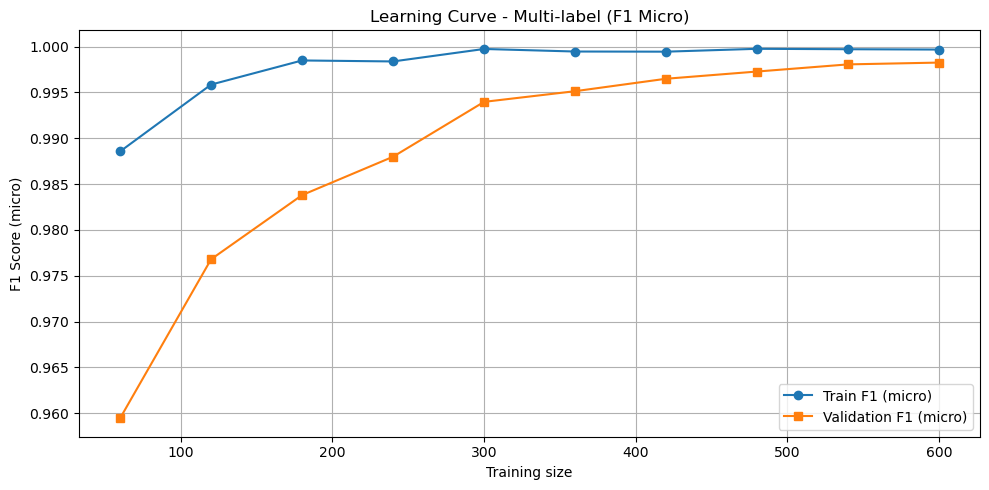

In [277]:
target_names = y_train.columns.tolist()  # ['bearings', 'wpump', 'exvalve', 'radiator']

ensemble_evaluation(model3, X_train, y_train, target_names)